<a href="https://colab.research.google.com/github/hsantos1985/core_projects/blob/main/NOTEBOOK_TCC_MBA7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Este notebook contem o draft do meu trabalho TCC para o MBA.
O objetivo dele é:

Criar um modelo de classificação que preve se o candidato da prova do ENEM, consegue tirar uma nota maior que a nota mínima de corte do seu Estado.

São mais de 30 variáveis explicativas para prever a variável target

De forma inicial, foram aplicados 6 modelos de classificação:

Regressão logística

Árvore de decisão

Random Forest


XGBoost

Catboost

LGBM



#1 - IMPORTANDO AS BIBLIOTECAS

In [1]:
import numpy as np
import pandas as pd
import os

#2 - IMPORTANDO OS ARQUIVOS 2021

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#dados ENEM 2021
base_enem=pd.read_csv('/content/drive/MyDrive/After_2023/17_MBA_DS_FIA/TCC/BASES_FINAIS/2021/MICRODADOS_ENEM_2021.csv',encoding='latin1', sep=';')

In [4]:
#VARIAVEL CRIADA PARA RECEBER A BASE DO ENEM
#REALIZAR OS TESTES DE TRANSFORMAÇÕES DAS VARIÁVEIS E RODAR NOVA MENTE ESTE COMANDO
dados_enem=base_enem

In [5]:
dados_enem.head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B
5,210052391248,2021,10,F,1,3,1,1,9,1,...,A,A,A,A,A,A,B,A,A,B
6,210052615524,2021,9,F,0,3,1,1,6,1,...,B,A,A,B,B,A,C,A,A,B
7,210054368957,2021,4,F,1,1,1,1,1,1,...,B,A,A,C,B,A,D,B,B,B
8,210053417016,2021,8,F,1,3,1,2,0,2,...,B,A,A,B,A,A,B,A,A,B
9,210051128744,2021,4,F,1,3,1,2,0,2,...,B,A,B,C,B,A,C,A,A,B


In [6]:
dados_enem.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [7]:
#dados competitividade dos estados
dados_compet=pd.read_excel('/content/drive/MyDrive/After_2023/17_MBA_DS_FIA/TCC/BASES_FINAIS/2021/BASE_COMPET_ESTADOS_2021.xlsx')


In [8]:
dados_compet.head(10)

,ESTADOS,UF,CMO,PEA_ES,PT,QT,FMT,IE,IEJ,TFEF,...,TC,CPFT,TI,TMVI,SPAT,FALP,DR,DI,OI,CV
0,Acre,AC,2107.25,0.213739,1678.452604,10.720673,0.526890,0.847424,0.616986,0.918975,...,0.007903,0.016277,0.051644,21.171582,469.523948,0.101729,0.479,0.0378,0.0821,0.488370
1,Alagoas,AL,1674.75,0.157509,1752.286886,10.201105,0.518225,0.822839,0.590792,0.918204,...,0.010700,0.003674,0.140226,31.764889,254.772831,0.084002,0.472,0.0331,0.0943,0.601336
2,Amazonas,AM,1792.25,0.171702,2275.525632,10.828422,0.405327,0.850319,0.665303,0.924711,...,0.031118,0.015831,0.059646,39.110116,914.357043,0.071744,0.481,0.0331,0.0649,0.605335
3,Amapá,AP,2167.00,0.215127,1799.182728,11.444385,0.493140,0.833016,0.658547,0.923694,...,0.017317,0.019336,0.027943,53.782248,933.099213,0.067715,0.459,0.0322,0.0690,0.441570
4,Bahia,BA,1589.00,0.128133,1812.091729,10.157565,0.451072,0.805602,0.662281,0.903427,...,0.001884,0.001123,0.070787,44.937420,485.763233,0.092806,0.500,0.0418,0.0806,0.514007
5,Ceará,CE,1728.00,0.150844,1602.037611,10.490657,0.463329,0.866144,0.628108,0.940656,...,0.011644,0.003381,0.090684,36.989020,520.973792,0.084926,0.526,0.0334,0.1123,0.597290
6,Distrito Federal,DF,4222.00,0.379685,5756.784570,12.906516,0.686109,0.860431,0.774211,0.936186,...,0.002264,0.008483,0.024908,11.214077,741.551065,0.033811,0.551,0.0165,0.0359,0.667804
7,Espírito Santo,ES,2361.00,0.182192,2241.592907,11.004908,0.606829,0.889083,0.723274,0.938656,...,-0.002549,0.005488,0.085524,28.234094,754.507476,0.042173,0.453,0.0285,0.0622,0.682982
8,Goiás,GO,2348.50,0.192228,1945.609052,11.089827,0.591696,0.887497,0.767182,0.933655,...,0.016133,0.008982,0.073694,26.101114,274.762443,0.029845,0.428,0.0322,0.0670,0.613850
9,Maranhão,MA,1488.00,0.127022,1517.991764,10.267285,0.398224,0.842292,0.581505,0.933546,...,0.014642,0.006464,0.112021,28.252845,725.291482,0.131903,0.484,0.0559,0.0861,0.505146


In [9]:
dados_compet.columns

Index(['ESTADOS', 'UF', 'CMO', 'PEA_ES', 'PT', 'QT', 'FMT', 'IE', 'IEJ',
       'TFEF', 'TFEM', 'TAEI', 'PSPP', 'EGRPE', 'AST', 'QST', 'CC', 'CEE',
       'QEE', 'QR', 'BMD', 'TM', 'TC', 'CPFT', 'TI', 'TMVI', 'SPAT', 'FALP',
       'DR', 'DI', 'OI', 'CV'],
      dtype='object')

In [10]:
#dados nota de corte
dados_nota_corte=pd.read_excel('/content/drive/MyDrive/After_2023/17_MBA_DS_FIA/TCC/BASES_FINAIS/2021/NOTAS_CORTE_UNIVERSIDADES_2021.xlsx', sheet_name='BASE_NOTAS_CORTE')

In [11]:
#criando um df com os UFs por região
regiao_uf=pd.DataFrame({'UF':['SP',
                 'MG',
                 'ES',
                 'RJ',
                 'RS',
                 'SC',
                 'PR',
                 'MT',
                 'GO',
                 'DF',
                 'MS',
                 'BA',
                 'PI',
                 'MA',
                 'CE',
                 'PE',
                 'AL',
                 'SE',
                 'RN',
                 'PB',
                 'AC',
                 'AP',
                 'AM',
                 'PA',
                 'RO',
                 'RR',
                 'TO'],
            'regiao':['sudeste',
                     'sudeste',
                     'sudeste',
                     'sudeste',
                     'sul',
                     'sul',
                     'sul',
                     'centro-oeste',
                     'centro-oeste',
                     'centro-oeste',
                     'centro-oeste',
                     'nordeste',
                     'nordeste',
                     'nordeste',
                     'nordeste',
                     'nordeste',
                     'nordeste',
                     'nordeste',
                     'nordeste',
                     'nordeste',
                     'norte',
                     'norte',
                     'norte',
                     'norte',
                     'norte',
                     'norte',
                     'norte']
})

In [12]:
dados_nota_corte.head(10)

,UF,MEDIA_MENOR_NOTA_CORTE,MEDIA_MAIOR_NOTA
0,SC,502.130,805.75
1,SP,500.545,824.36
2,MG,263.760,794.52
3,DF,668.770,819.54
4,RS,501.440,775.95
5,MS,384.830,809.95
6,AC,599.970,865.35
7,GO,372.720,782.35
8,PI,410.960,787.31
9,PR,421.400,793.18


#2-2 IMPORTANDO OS ARQUIVOS DE 2022 - VALIDAÇÃO





In [ ]:
#dados ENEM 2022
dados_enem22=pd.read_csv('/content/drive/MyDrive/After_2023/17_MBA_DS_FIA/TCC/BASES_FINAIS/2022/MICRODADOS_ENEM_2022.csv',encoding='latin1', sep=';')

In [ ]:
dados_enem22.head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A
5,210057850231,2022,5,F,1,3,1,1,2,1,...,B,A,A,C,A,B,D,A,A,B
6,210056305481,2022,4,M,1,2,1,1,2,1,...,A,A,A,C,A,A,C,A,A,B
7,210055778089,2022,6,F,1,2,1,1,0,1,...,B,A,A,C,A,A,E,A,A,B
8,210057252239,2022,8,F,1,3,1,1,0,1,...,A,A,A,B,A,A,B,A,A,B
9,210055461467,2022,4,F,1,3,1,1,1,1,...,A,A,A,B,A,A,B,A,A,B


In [ ]:
dados_enem22.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [ ]:
base_enem22=dados_enem22

In [ ]:
#dados competitividade dos estados 2022
dados_compet22=pd.read_excel('/content/drive/MyDrive/After_2023/17_MBA_DS_FIA/TCC/BASES_FINAIS/2022/BASE_COMPET_ESTADOS.xlsx')

In [ ]:
dados_compet22

,ESTADOS,UF,CMO,PEA_ES,PT,QT,FMT,IE,IEJ,DLP,...,IM,FALP,DR,ASBA,ASBE,DI,OI,CV,TINF,TE
0,Acre,AC,2306.25,21.962816,1431.861075,10.690878,52.932099,88.223281,71.084337,35.2,...,53.651932,12.275813,0.448,58.980152,47.636364,3.51,7.07,57.358722,1.700680,6.559767
1,Alagoas,AL,1814.25,15.271599,1494.727886,10.240985,54.133776,88.835579,69.523810,26.7,...,43.987345,8.538846,0.455,71.740059,40.682657,2.86,7.90,75.425108,2.192067,0.000000
2,Amazonas,AM,2042.00,19.237276,1898.635958,11.032369,42.528243,89.287538,74.532502,34.4,...,49.772400,8.155398,0.480,73.216613,47.007806,2.77,5.99,70.987494,3.075769,0.000000
3,Amapá,AP,2302.75,21.074610,1385.406056,11.121529,51.103448,87.613293,72.690763,32.8,...,73.723228,7.910536,0.502,49.781830,20.901639,3.01,6.44,49.062499,0.711744,0.000000
4,Bahia,BA,1728.50,14.487907,1429.497947,10.092128,46.688645,84.579274,74.671241,37.0,...,23.836547,10.384825,0.476,83.465866,59.528826,4.15,6.99,65.143448,2.791547,0.681913
5,Ceará,CE,1804.00,16.389670,1338.138203,10.519122,47.106457,90.595750,72.442019,24.2,...,26.864079,9.396859,0.501,82.455759,52.889324,3.16,9.82,76.801839,10.977702,0.384615
6,Distrito Federal,DF,4558.75,37.171909,4570.621545,12.642227,69.731013,88.689307,85.732984,16.5,...,10.622153,2.413288,0.536,94.991103,90.018657,1.77,3.44,75.041998,1.387137,0.714002
7,Espírito Santo,ES,2679.00,20.402512,1961.606415,10.938764,61.182552,92.093347,82.863585,24.4,...,19.744079,4.074818,0.470,84.691459,78.168044,2.58,4.96,66.122049,22.408964,0.897129
8,Goiás,GO,2607.00,20.316879,1664.354329,11.050479,61.307493,92.893819,83.530073,5.6,...,24.561793,2.470435,0.434,87.800543,61.688059,3.22,5.54,67.038902,3.002183,4.617482
9,Maranhão,MA,1659.50,15.225577,1277.575035,10.302217,41.113447,89.625774,69.111111,22.6,...,41.470486,13.266827,0.489,73.499932,26.785714,6.14,7.75,62.073234,2.771468,1.482430


In [ ]:
dados_compet22.columns

Index(['ESTADOS', 'UF', 'CMO', 'PEA_ES', 'PT', 'QT', 'FMT', 'IE', 'IEJ', 'DLP',
       'SIHT', 'ENEM', 'TFEF', 'TFEM', 'TAEI', 'PSPP', 'EGRPE', 'AST', 'QST',
       'CC', 'AEE', 'CEE', 'QEE', 'QR', 'PAT', 'BMD', 'TM', 'TC', 'CPFT', 'CR',
       'QCPF', 'VC', 'INAD', 'TI', 'SP', 'SPAT', 'VS', 'IM', 'FALP', 'DR',
       'ASBA', 'ASBE', 'DI', 'OI', 'CV', 'TINF', 'TE'],
      dtype='object')

In [ ]:
#dados nota de corte 2022
dados_nota_corte22=pd.read_excel('/content/drive/MyDrive/After_2023/17_MBA_DS_FIA/TCC/BASES_FINAIS/2022/NOTAS_CORTE_UNIVERSIDADES_2022.xlsx', sheet_name='BASE_NOTAS_CORTE')

In [ ]:
#base assassinatos 2022
base_assassinatos_2022=pd.read_excel('/content/drive/MyDrive/After_2023/17_MBA_DS_FIA/TCC/BASES_FINAIS/2022/BASE_ASSASSINATOS_UF.xlsx', sheet_name='BASE')

In [ ]:
base_assassinatos_2022.columns

Index(['UF', 'ESTADO', 'TMVI'], dtype='object')

In [ ]:
#renomenado a coluna
base_assassinatos_2022.rename(columns={'UF': 'UF2'}, inplace=True)

In [ ]:
base_assassinatos_2022.columns

Index(['UF2', 'ESTADO', 'TMVI'], dtype='object')

#3 - CRIAÇÃO DA ABT - -DADOS 2021

In [13]:
#CRIAÇÃO DA ABT
base_abt=(
dados_enem
.filter(['NU_INSCRICAO','TP_FAIXA_ETARIA','TP_SEXO',
                  'TP_ESTADO_CIVIL','TP_COR_RACA','TP_NACIONALIDADE',
                  'TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA','IN_TREINEIRO','TP_ENSINO',
                  'SG_UF_PROVA','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT',
                  'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TP_STATUS_REDACAO','NU_NOTA_REDACAO'])
#FILTRO DA BASE CONSIDERANDO APENAS OS ALUNOS PRESENTES EM TODAS AS PROVAS E CUJA REDAÇÃO NÃO TENHA SIDO ANULADA
.query('TP_PRESENCA_CH==1 & TP_PRESENCA_LC==1 & TP_PRESENCA_MT==1 & TP_PRESENCA_CN==1  & TP_STATUS_REDACAO!=2')
#fazendo um join com os dados de competitividade dos estados
.merge(dados_compet, how='left', left_on='SG_UF_PROVA', right_on='UF')
#fazendo um merge com as notas de cortes de cada estado
.merge(dados_nota_corte, how='left', left_on='SG_UF_PROVA', right_on='UF')
#criando um merge com do df de regiao
.merge(regiao_uf, how='left', left_on='SG_UF_PROVA', right_on='UF')
#criando uma feature com a média da nota final dos candidatos, FOI CONSIDERADA A SOMA TODAS DAS COMPETÊNCIAS DIVIDIDO POR 5
.assign(NOTA_FINAL=lambda df_memoria:((df_memoria['NU_NOTA_CN']+df_memoria['NU_NOTA_CH']+df_memoria['NU_NOTA_LC']+df_memoria['NU_NOTA_MT']+df_memoria['NU_NOTA_REDACAO'])/5))
#CRIANDO A COLUNA SE A NOTA FINAL É MAIOR QUE A MÉDIA DA MAIOR NOTA
.assign(NOTA_FINAL_MMN=lambda df_memoria: (df_memoria['NOTA_FINAL'] >= df_memoria['MEDIA_MAIOR_NOTA']).astype(int))
#CRIANDO A COLUNA TARGET SE A NOTA FINAL, É MENOR QUE A MENOR NOTA DE CORTE DO ESTADO
.assign(TARGET=lambda df_memoria: (df_memoria['NOTA_FINAL'] >= df_memoria['MEDIA_MENOR_NOTA_CORTE']).astype(int))

#TRATANDO A COLUNA FAIXA ETARIA
.replace({'TP_FAIXA_ETARIA':{1:'Menor_17anos',2:'Entre_17_25anos',3:'Entre_17_25anos',4:'Entre_17_25anos',
                             5:'Entre_17_25anos',6:'Entre_17_25anos',7:'Entre_17_25anos',
                             8:'Entre_17_25anos',9:'Entre_17_25anos',10:'Entre_17_25anos',
                             11:'Entre_26_40anos',12:'Entre_26_40anos',
                             13:'Entre_26_40anos',14:'Acima_40anos',
                             15:'Acima_40anos',16:'Acima_40anos',17:'Acima_40anos',
                            18:'Acima_40anos',19:'Acima_40anos',20:'Acima_40anos'}})

#TRATANDO A COLUNA ESTADO CIVIL
.replace({'TP_ESTADO_CIVIL':{0:'0',1:'1',2:'2',
                             3:'3',4:'4'}})
#TRATANDO A COLUNA RAÇA
.replace({'TP_COR_RACA':{0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',
                         6:'6'}})
#TRATANDO A COLUNA NACIONALIDADE
.replace({'TP_NACIONALIDADE':{0:'0',1:'1',2:'2',
                              3:'3',4:'4'}})
#TRATANDO A COLUNA CONCLUSÃO ENSINO MÉDIO
.replace({'TP_ST_CONCLUSAO':{1:'1',2:'2',
                             3:'3',
                              4:'4'}})

#TRATANDO A COLUNA ANO DE CONCLUSÃO ENSINO MÉDIO
.replace({'TP_ANO_CONCLUIU':{0:'Nao_informado',1:'Abaixo_7anos',2:'Abaixo_7anos',3:'Abaixo_7anos',
                             4:'Abaixo_7anos',5:'Abaixo_7anos',
                             6:'Abaixo_7anos',7:'Abaixo_7anos',8:'Entre7_15anos',
                             9:'Entre7_15anos',10:'Entre7_15anos',
                             11:'Entre7_15anos',12:'Entre7_15anos',
                             13:'Entre7_15anos',14:'Entre7_15anos',
                             15:'Entre7_15anos',16:'Acima_15anos'}})

#TRATANDO A COLUNA TIPO DE ENSINO
.replace({'TP_ENSINO':{1:'1',2:'2'}})

#TRATANDO A COLUNA TREINEIRO
.replace({'IN_TREINEIRO':{1:'Sim',0:'Nao'}})

#TRATANDO A COLUNA TIPO DE ESCOLA
.replace({'TP_ESCOLA':{1:'1',2:'2',3:'3'}})

#TRATANDO A COLUNA ESTATUS DA REDAÇÃO
.replace({'TP_STATUS_REDACAO':{1:'Sem_problemas',2:'Com_algum_problema',3:'Com_algum_problema',
                               4:'Com_algum_problema',
                               6:'Com_algum_problema',7:'Com_algum_problema',
                               8:'Com_algum_problema',9:'Com_algum_problema'}})
#filtro das features
.drop_duplicates()

)
base_abt

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,OI,CV,UF_y,MEDIA_MENOR_NOTA_CORTE,MEDIA_MAIOR_NOTA,UF,regiao,NOTA_FINAL,NOTA_FINAL_MMN,TARGET
0,210052384164,Entre_26_40anos,M,1,1,1,1,Entre7_15anos,1,Nao,...,0.0943,0.601336,AL,298.740,778.68,AL,nordeste,515.50,0,1
1,210052128335,Entre_17_25anos,M,1,3,1,2,Nao_informado,2,Nao,...,0.1123,0.597290,CE,378.000,786.80,CE,nordeste,667.60,0,1
2,210051353021,Entre_17_25anos,F,1,3,1,2,Nao_informado,2,Nao,...,0.1123,0.597290,CE,378.000,786.80,CE,nordeste,570.06,0,1
3,210053417016,Entre_17_25anos,F,1,3,1,2,Nao_informado,2,Nao,...,0.0682,0.676067,MG,263.760,794.52,MG,sudeste,485.60,0,1
4,210051128744,Entre_17_25anos,F,1,3,1,2,Nao_informado,2,Nao,...,0.0806,0.514007,BA,353.670,773.07,BA,nordeste,466.94,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236168,210054306230,Acima_40anos,F,1,1,1,4,Nao_informado,1,Nao,...,0.0594,0.621417,SP,500.545,824.36,SP,sudeste,403.58,0,0
2236169,210051254419,Acima_40anos,M,2,3,1,1,Entre7_15anos,1,Nao,...,0.0682,0.676067,MG,263.760,794.52,MG,sudeste,444.14,0,1
2236170,210051121001,Entre_17_25anos,M,1,1,1,1,Entre7_15anos,1,Nao,...,0.0676,0.461806,RJ,394.100,813.55,RJ,sudeste,626.30,0,1
2236171,210051173067,Entre_17_25anos,F,1,3,1,1,Abaixo_7anos,1,Nao,...,0.0649,0.605335,AM,565.950,794.69,AM,norte,438.88,0,0


In [14]:
base_abt.columns

Index(['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'IN_TREINEIRO', 'TP_ENSINO', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'ESTADOS', 'UF_x', 'CMO',
       'PEA_ES', 'PT', 'QT', 'FMT', 'IE', 'IEJ', 'TFEF', 'TFEM', 'TAEI',
       'PSPP', 'EGRPE', 'AST', 'QST', 'CC', 'CEE', 'QEE', 'QR', 'BMD', 'TM',
       'TC', 'CPFT', 'TI', 'TMVI', 'SPAT', 'FALP', 'DR', 'DI', 'OI', 'CV',
       'UF_y', 'MEDIA_MENOR_NOTA_CORTE', 'MEDIA_MAIOR_NOTA', 'UF', 'regiao',
       'NOTA_FINAL', 'NOTA_FINAL_MMN', 'TARGET'],
      dtype='object')

In [15]:
#VERIFICAÇÃO DAS COLUNAS EM BRANCO
colunas_em_branco = base_abt.isnull().all()
colunas_em_branco

,0
NU_INSCRICAO,False
TP_FAIXA_ETARIA,False
TP_SEXO,False
TP_ESTADO_CIVIL,False
TP_COR_RACA,False
...,...
UF,False
regiao,False
NOTA_FINAL,False
NOTA_FINAL_MMN,False


In [16]:
colunas_completamente_em_branco = colunas_em_branco[colunas_em_branco].index.tolist()
colunas_completamente_em_branco

[]

##3.1 - BASE ABT PARA VALIDAÇÃO - DADOS 2022

In [ ]:
#CRIAÇÃO DA ABT
base_abt_validacao22=(
dados_enem22
.filter(['NU_INSCRICAO','TP_FAIXA_ETARIA','TP_SEXO',
                  'TP_ESTADO_CIVIL','TP_COR_RACA','TP_NACIONALIDADE',
                  'TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA','IN_TREINEIRO','TP_ENSINO',
                  'SG_UF_PROVA','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT',
                  'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TP_STATUS_REDACAO','NU_NOTA_REDACAO'])
#FILTRO DA BASE CONSIDERANDO APENAS OS ALUNOS PRESENTES EM TODAS AS PROVAS E CUJA REDAÇÃO NÃO TENHA SIDO ANULADA
.query('TP_PRESENCA_CH==1 & TP_PRESENCA_LC==1 & TP_PRESENCA_MT==1 & TP_PRESENCA_CN==1  & TP_STATUS_REDACAO!=2')
#fazendo um join com os dados de competitividade dos estados
.merge(dados_compet22, how='left', left_on='SG_UF_PROVA', right_on='UF')
#fazendo um merge com as notas de cortes de cada estado
.merge(dados_nota_corte22, how='left', left_on='SG_UF_PROVA', right_on='UF')
#criando um merge com do df de regiao
.merge(regiao_uf, how='left', left_on='SG_UF_PROVA', right_on='UF')
#criando uma feature com a média da nota final dos candidatos, FOI CONSIDERADA A SOMA TODAS DAS COMPETÊNCIAS DIVIDIDO POR 5
.assign(NOTA_FINAL=lambda df_memoria:((df_memoria['NU_NOTA_CN']+df_memoria['NU_NOTA_CH']+df_memoria['NU_NOTA_LC']+df_memoria['NU_NOTA_MT']+df_memoria['NU_NOTA_REDACAO'])/5))
#CRIANDO A COLUNA SE A NOTA FINAL É MAIOR QUE A MÉDIA DA MAIOR NOTA
.assign(NOTA_FINAL_MMN=lambda df_memoria: (df_memoria['NOTA_FINAL'] >= df_memoria['MEDIA_MAIOR_NOTA']).astype(int))
#CRIANDO A COLUNA TARGET SE A NOTA FINAL, É MENOR QUE A MENOR NOTA DE CORTE DO ESTADO
.assign(TARGET=lambda df_memoria: (df_memoria['NOTA_FINAL'] >= df_memoria['MEDIA_MENOR_NOTA_CORTE']).astype(int))


#TRATANDO A COLUNA FAIXA ETARIA
.replace({'TP_FAIXA_ETARIA':{1:'Menor_17anos',2:'Entre_17_25anos',3:'Entre_17_25anos',4:'Entre_17_25anos',
                             5:'Entre_17_25anos',6:'Entre_17_25anos',7:'Entre_17_25anos',
                             8:'Entre_17_25anos',9:'Entre_17_25anos',10:'Entre_17_25anos',
                             11:'Entre_26_40anos',12:'Entre_26_40anos',
                             13:'Entre_26_40anos',14:'Acima_40anos',
                             15:'Acima_40anos',16:'Acima_40anos',17:'Acima_40anos',
                            18:'Acima_40anos',19:'Acima_40anos',20:'Acima_40anos'}})

#TRATANDO A COLUNA ESTADO CIVIL
.replace({'TP_ESTADO_CIVIL':{0:'0',1:'1',2:'2',
                             3:'3',4:'4'}})
#TRATANDO A COLUNA RAÇA
.replace({'TP_COR_RACA':{0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',
                         6:'6'}})
#TRATANDO A COLUNA NACIONALIDADE
.replace({'TP_NACIONALIDADE':{0:'0',1:'1',2:'2',
                              3:'3',4:'4'}})
#TRATANDO A COLUNA CONCLUSÃO ENSINO MÉDIO
.replace({'TP_ST_CONCLUSAO':{1:'1',2:'2',
                             3:'3',
                              4:'4'}})

#TRATANDO A COLUNA ANO DE CONCLUSÃO ENSINO MÉDIO
.replace({'TP_ANO_CONCLUIU':{0:'Nao_informado',1:'Abaixo_7anos',2:'Abaixo_7anos',3:'Abaixo_7anos',
                             4:'Abaixo_7anos',5:'Abaixo_7anos',
                             6:'Abaixo_7anos',7:'Abaixo_7anos',8:'Entre7_15anos',
                             9:'Entre7_15anos',10:'Entre7_15anos',
                             11:'Entre7_15anos',12:'Entre7_15anos',
                             13:'Entre7_15anos',14:'Entre7_15anos',
                             15:'Entre7_15anos',16:'Acima_15anos'}})

#TRATANDO A COLUNA TIPO DE ENSINO
.replace({'TP_ENSINO':{1:'1',2:'2'}})

#TRATANDO A COLUNA TREINEIRO
.replace({'IN_TREINEIRO':{1:'Sim',0:'Nao'}})

#TRATANDO A COLUNA TIPO DE ESCOLA
.replace({'TP_ESCOLA':{1:'1',2:'2',3:'3'}})

#TRATANDO A COLUNA ESTATUS DA REDAÇÃO
.replace({'TP_STATUS_REDACAO':{1:'Sem_problemas',2:'Com_algum_problema',3:'Com_algum_problema',
                               4:'Com_algum_problema',
                               6:'Com_algum_problema',7:'Com_algum_problema',
                               8:'Com_algum_problema',9:'Com_algum_problema'}})

#CRIANDO A COLUNA TMVI COM A BASE DE ASSASSINATOS 2022
.merge(base_assassinatos_2022[['UF2','TMVI']], how='left', left_on='SG_UF_PROVA', right_on='UF2')


#filtro das features
.drop_duplicates()

)
base_abt_validacao22

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,UF_y,MEDIA_MENOR_NOTA_CORTE,MEDIA_MAIOR_NOTA,UF,regiao,NOTA_FINAL,NOTA_FINAL_MMN,TARGET,UF2,TMVI
0,210057280536,Entre_17_25anos,F,1,2,1,1,Abaixo_7anos,1,Nao,...,BA,386.65,794.43,BA,nordeste,558.24,0,1,BA,47.1
1,210055724397,Entre_17_25anos,M,1,3,1,1,Abaixo_7anos,1,Nao,...,ES,419.16,811.42,ES,sudeste,394.62,0,0,ES,29.3
2,210055778089,Entre_17_25anos,F,1,2,1,1,Nao_informado,1,Nao,...,RJ,431.27,828.24,RJ,sudeste,414.10,0,0,RJ,27.9
3,210055461467,Entre_17_25anos,F,1,3,1,1,Abaixo_7anos,1,Nao,...,PE,366.00,859.00,PE,nordeste,438.10,0,1,PE,37.8
4,210054972570,Entre_17_25anos,F,1,1,1,2,Nao_informado,3,Nao,...,SE,436.00,791.00,SE,nordeste,576.70,0,1,SE,34.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343143,210057138057,Entre_26_40anos,M,2,1,1,1,Abaixo_7anos,1,Nao,...,PA,686.00,873.95,PA,norte,488.40,0,0,PA,36.9
2343144,210055398098,Entre_26_40anos,F,1,2,1,1,Entre7_15anos,1,Nao,...,SP,512.20,830.18,SP,sudeste,617.92,0,1,SP,8.4
2343145,210055668087,Entre_17_25anos,M,0,3,1,2,Nao_informado,2,Nao,...,MG,300.00,811.00,MG,sudeste,541.22,0,1,MG,12.6
2343146,210055303118,Entre_26_40anos,F,1,1,1,1,Entre7_15anos,1,Nao,...,PR,318.88,814.26,PR,sul,507.22,0,1,PR,22.7


In [ ]:
#FILTRO DAS COLUNAS FINAIS
base_abt_validacao22=base_abt_validacao22[['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'IN_TREINEIRO', 'TP_ENSINO', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'ESTADOS', 'UF_x', 'CMO',
       'PEA_ES', 'PT', 'QT', 'FMT', 'IE', 'IEJ', 'TFEF', 'TFEM', 'TAEI',
       'PSPP', 'EGRPE', 'AST', 'QST', 'CC', 'CEE', 'QEE', 'QR', 'BMD', 'TM',
       'TC', 'CPFT', 'TI', 'TMVI', 'SPAT', 'FALP', 'DR', 'DI', 'OI', 'CV',
       'UF_y', 'MEDIA_MENOR_NOTA_CORTE', 'MEDIA_MAIOR_NOTA', 'UF', 'regiao',
       'NOTA_FINAL', 'NOTA_FINAL_MMN', 'TARGET']]

In [ ]:
base_abt_validacao22.head(10)

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,OI,CV,UF_y,MEDIA_MENOR_NOTA_CORTE,MEDIA_MAIOR_NOTA,UF,regiao,NOTA_FINAL,NOTA_FINAL_MMN,TARGET
0,210057280536,Entre_17_25anos,F,1,2,1,1,Abaixo_7anos,1,Nao,...,6.99,65.143448,BA,386.65,794.43,BA,nordeste,558.24,0,1
1,210055724397,Entre_17_25anos,M,1,3,1,1,Abaixo_7anos,1,Nao,...,4.96,66.122049,ES,419.16,811.42,ES,sudeste,394.62,0,0
2,210055778089,Entre_17_25anos,F,1,2,1,1,Nao_informado,1,Nao,...,6.59,51.441859,RJ,431.27,828.24,RJ,sudeste,414.10,0,0
3,210055461467,Entre_17_25anos,F,1,3,1,1,Abaixo_7anos,1,Nao,...,8.54,67.292048,PE,366.00,859.00,PE,nordeste,438.10,0,1
4,210054972570,Entre_17_25anos,F,1,1,1,2,Nao_informado,3,Nao,...,9.48,70.105291,SE,436.00,791.00,SE,nordeste,576.70,0,1
5,210056065100,Entre_17_25anos,F,1,3,1,3,Nao_informado,1,Sim,...,4.29,66.672730,SP,512.20,830.18,SP,sudeste,530.58,0,1
6,210057551883,Entre_17_25anos,F,1,2,1,1,Abaixo_7anos,1,Nao,...,5.56,75.639300,MG,300.00,811.00,MG,sudeste,645.80,0,1
7,210055739197,Menor_17anos,F,1,3,1,3,Nao_informado,1,Sim,...,8.54,67.292048,PE,366.00,859.00,PE,nordeste,378.74,0,1
8,210056235859,Entre_17_25anos,F,1,1,1,1,Nao_informado,1,Nao,...,6.59,51.441859,RJ,431.27,828.24,RJ,sudeste,500.40,0,1
9,210057706656,Entre_17_25anos,M,1,3,1,1,Abaixo_7anos,1,Nao,...,9.82,76.801839,CE,307.00,802.00,CE,nordeste,605.58,0,1


In [ ]:
#separação das ariáveis bas evalidação
y_val=base_abt_validacao22['TARGET']
X_val=base_abt_validacao22[['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'IN_TREINEIRO','NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'CMO', 'PEA_ES', 'PT', 'QT',
       'FMT', 'IE', 'IEJ', 'TFEF', 'TFEM', 'TAEI', 'PSPP', 'EGRPE', 'AST',
       'QST', 'CC', 'CEE', 'QEE', 'QR', 'BMD', 'TM', 'TC', 'CPFT', 'TI',
       'TMVI', 'SPAT', 'FALP', 'DR', 'DI', 'OI', 'CV',
       'MEDIA_MENOR_NOTA_CORTE', 'MEDIA_MAIOR_NOTA', 'regiao',
       'NOTA_FINAL']]

In [ ]:
#transformação das variáveis categoricas com rotulos
colunas=['TP_FAIXA_ETARIA','TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'TP_STATUS_REDACAO']
# Convertendo as colunas para categóricas
for i in colunas:
    X_val[i] = X_val[i].astype('category')

<ipython-input-33-4df4613b88fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[i] = X_val[i].astype('category')
<ipython-input-33-4df4613b88fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[i] = X_val[i].astype('category')
<ipython-input-33-4df4613b88fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
#SEPARAÇÃO DAS VARIÁVEIS
num_vars_val=['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'CMO', 'PEA_ES', 'PT', 'QT',
       'FMT', 'IE', 'IEJ', 'TFEF', 'TFEM', 'TAEI', 'PSPP', 'EGRPE', 'AST',
       'QST', 'CC', 'CEE', 'QEE', 'QR', 'BMD', 'TM', 'TC', 'CPFT', 'TI',
       'TMVI', 'SPAT', 'FALP', 'DR', 'DI', 'OI', 'CV',
       'MEDIA_MENOR_NOTA_CORTE', 'MEDIA_MAIOR_NOTA',
       'NOTA_FINAL']
cat_vars_val=['regiao','TP_STATUS_REDACAO','TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'IN_TREINEIRO']

target_val='TARGET'
features_val=num_vars_val+cat_vars_val

#4 - SEPARAÇÃO ENTRE BASE DE TREINO E TESTE

##4.1-VERIFICAÇÃO DO BALANCEAMENTO DA BASE

In [17]:
#verificação se a base esta balanceada
base_abt['TARGET'].value_counts()/len(base_abt)
#a base está desbalanceada, existem 70% de valores na classe 1 e 29% na classe 0

,count
TARGET,
1,0.709246
0,0.290754


In [18]:
#CRIANDO O BALANCEAMENTO DA BASE - UTILIZANDO O METODO UPSAMPLE
from sklearn.utils import resample

#separando as classes majoritarias
df_max=base_abt[base_abt['TARGET']==1]

In [19]:
df_max

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,OI,CV,UF_y,MEDIA_MENOR_NOTA_CORTE,MEDIA_MAIOR_NOTA,UF,regiao,NOTA_FINAL,NOTA_FINAL_MMN,TARGET
0,210052384164,Entre_26_40anos,M,1,1,1,1,Entre7_15anos,1,Nao,...,0.0943,0.601336,AL,298.740,778.68,AL,nordeste,515.50,0,1
1,210052128335,Entre_17_25anos,M,1,3,1,2,Nao_informado,2,Nao,...,0.1123,0.597290,CE,378.000,786.80,CE,nordeste,667.60,0,1
2,210051353021,Entre_17_25anos,F,1,3,1,2,Nao_informado,2,Nao,...,0.1123,0.597290,CE,378.000,786.80,CE,nordeste,570.06,0,1
3,210053417016,Entre_17_25anos,F,1,3,1,2,Nao_informado,2,Nao,...,0.0682,0.676067,MG,263.760,794.52,MG,sudeste,485.60,0,1
4,210051128744,Entre_17_25anos,F,1,3,1,2,Nao_informado,2,Nao,...,0.0806,0.514007,BA,353.670,773.07,BA,nordeste,466.94,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236163,210052132249,Entre_26_40anos,M,1,1,1,1,Entre7_15anos,1,Nao,...,0.0594,0.621417,SP,500.545,824.36,SP,sudeste,512.72,0,1
2236166,210053420295,Entre_26_40anos,F,1,3,1,1,Abaixo_7anos,1,Nao,...,0.0622,0.682982,ES,399.400,793.05,ES,sudeste,410.22,0,1
2236169,210051254419,Acima_40anos,M,2,3,1,1,Entre7_15anos,1,Nao,...,0.0682,0.676067,MG,263.760,794.52,MG,sudeste,444.14,0,1
2236170,210051121001,Entre_17_25anos,M,1,1,1,1,Entre7_15anos,1,Nao,...,0.0676,0.461806,RJ,394.100,813.55,RJ,sudeste,626.30,0,1


In [20]:
#separando as classes minoritaria
df_min=base_abt[base_abt['TARGET']==0]

In [21]:
df_min

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,OI,CV,UF_y,MEDIA_MENOR_NOTA_CORTE,MEDIA_MAIOR_NOTA,UF,regiao,NOTA_FINAL,NOTA_FINAL_MMN,TARGET
7,210053193408,Entre_26_40anos,M,2,3,1,1,Entre7_15anos,1,Nao,...,0.0707,0.484694,PA,686.000,873.00,PA,norte,527.40,0,0
9,210053788150,Entre_17_25anos,F,1,1,1,1,Abaixo_7anos,1,Nao,...,0.0921,0.567707,PE,614.130,846.59,PE,nordeste,533.82,0,0
11,210054206376,Entre_17_25anos,F,1,3,1,2,Nao_informado,2,Nao,...,0.0861,0.505146,MA,693.960,928.38,MA,nordeste,559.56,0,0
12,210053797083,Entre_26_40anos,M,1,3,1,1,Entre7_15anos,1,Nao,...,0.0921,0.567707,PE,614.130,846.59,PE,nordeste,563.34,0,0
13,210051604126,Entre_26_40anos,F,1,3,1,1,Entre7_15anos,1,Nao,...,0.0707,0.484694,PA,686.000,873.00,PA,norte,576.14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236164,210054035225,Entre_26_40anos,F,2,3,1,1,Entre7_15anos,1,Nao,...,0.0359,0.667804,DF,668.770,819.54,DF,centro-oeste,445.30,0,0
2236165,210054038381,Entre_26_40anos,M,1,3,1,1,Entre7_15anos,1,Nao,...,0.0861,0.505146,MA,693.960,928.38,MA,nordeste,598.00,0,0
2236167,210053609128,Entre_26_40anos,F,1,1,1,4,Nao_informado,1,Nao,...,0.0589,0.614655,MS,384.830,809.95,MS,centro-oeste,333.56,0,0
2236168,210054306230,Acima_40anos,F,1,1,1,4,Nao_informado,1,Nao,...,0.0594,0.621417,SP,500.545,824.36,SP,sudeste,403.58,0,0


In [22]:
#utilizando o upsample pois aumneta o numero de casos da classe minoritaria
df_min_upsample=resample(
    df_min,
    replace=True,
    n_samples=len(df_max),
    random_state=42)

In [23]:
#uniao das 2 classes
base_abt_up=pd.concat([df_max,df_min_upsample])
base_abt_up

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,OI,CV,UF_y,MEDIA_MENOR_NOTA_CORTE,MEDIA_MAIOR_NOTA,UF,regiao,NOTA_FINAL,NOTA_FINAL_MMN,TARGET
0,210052384164,Entre_26_40anos,M,1,1,1,1,Entre7_15anos,1,Nao,...,0.0943,0.601336,AL,298.74,778.68,AL,nordeste,515.50,0,1
1,210052128335,Entre_17_25anos,M,1,3,1,2,Nao_informado,2,Nao,...,0.1123,0.597290,CE,378.00,786.80,CE,nordeste,667.60,0,1
2,210051353021,Entre_17_25anos,F,1,3,1,2,Nao_informado,2,Nao,...,0.1123,0.597290,CE,378.00,786.80,CE,nordeste,570.06,0,1
3,210053417016,Entre_17_25anos,F,1,3,1,2,Nao_informado,2,Nao,...,0.0682,0.676067,MG,263.76,794.52,MG,sudeste,485.60,0,1
4,210051128744,Entre_17_25anos,F,1,3,1,2,Nao_informado,2,Nao,...,0.0806,0.514007,BA,353.67,773.07,BA,nordeste,466.94,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172136,210052030848,Menor_17anos,F,1,3,1,3,Nao_informado,1,Sim,...,0.0861,0.505146,MA,693.96,928.38,MA,nordeste,479.98,0,0
392792,210052151532,Entre_17_25anos,F,1,1,1,2,Nao_informado,3,Nao,...,0.0649,0.605335,AM,565.95,794.69,AM,norte,518.04,0,0
1062037,210053719361,Entre_17_25anos,F,1,3,1,2,Nao_informado,2,Nao,...,0.0707,0.484694,PA,686.00,873.00,PA,norte,446.12,0,0
2005865,210052585955,Entre_26_40anos,F,3,3,1,1,Nao_informado,1,Nao,...,0.0861,0.505146,MA,693.96,928.38,MA,nordeste,447.72,0,0


In [24]:
#embaralhando o df
base_abt_up=base_abt_up.sample(frac=1,random_state=42).reset_index(drop=True)

In [25]:
#verificando se os dados estão balanceados
base_abt_up['TARGET'].value_counts()/len(base_abt_up)

,count
TARGET,
0,0.5
1,0.5


In [26]:
#SEPARAÇÃO DE TREINO EM 70% E TESTE 30%
from sklearn.model_selection import train_test_split
y=base_abt_up['TARGET']
X=base_abt_up[['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'IN_TREINEIRO','NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'CMO', 'PEA_ES', 'PT', 'QT',
       'FMT', 'IE', 'IEJ', 'TFEF', 'TFEM', 'TAEI', 'PSPP', 'EGRPE', 'AST',
       'QST', 'CC', 'CEE', 'QEE', 'QR', 'BMD', 'TM', 'TC', 'CPFT', 'TI',
       'TMVI', 'SPAT', 'FALP', 'DR', 'DI', 'OI', 'CV',
       'MEDIA_MENOR_NOTA_CORTE', 'MEDIA_MAIOR_NOTA', 'regiao',
       'NOTA_FINAL']]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
X_train

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,...,SPAT,FALP,DR,DI,OI,CV,MEDIA_MENOR_NOTA_CORTE,MEDIA_MAIOR_NOTA,regiao,NOTA_FINAL
1767934,Entre_17_25anos,M,1,2,1,2,Nao_informado,2,Nao,437.7,...,485.763233,0.092806,0.500,0.0418,0.0806,0.514007,353.670,773.07,nordeste,399.84
642367,Entre_17_25anos,F,1,1,1,1,Abaixo_7anos,1,Nao,364.8,...,483.837513,0.034784,0.506,0.0155,0.0594,0.621417,500.545,824.36,sudeste,398.52
1337922,Entre_17_25anos,M,1,1,1,1,Abaixo_7anos,1,Nao,573.4,...,741.551065,0.033811,0.551,0.0165,0.0359,0.667804,668.770,819.54,centro-oeste,677.98
1247933,Entre_17_25anos,F,1,2,1,1,Abaixo_7anos,1,Nao,465.7,...,534.771132,0.106709,0.540,0.0336,0.0921,0.567707,614.130,846.59,nordeste,532.88
2360363,Entre_17_25anos,M,1,2,1,2,Nao_informado,2,Nao,390.8,...,483.837513,0.034784,0.506,0.0155,0.0594,0.621417,500.545,824.36,sudeste,494.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692743,Acima_40anos,F,1,3,2,1,Entre7_15anos,1,Nao,406.1,...,485.763233,0.092806,0.500,0.0418,0.0806,0.514007,353.670,773.07,nordeste,439.34
2356330,Entre_17_25anos,M,1,3,1,1,Abaixo_7anos,1,Nao,462.5,...,232.953599,0.027476,0.433,0.0342,0.0642,0.652242,276.820,779.00,centro-oeste,321.42
2229084,Entre_17_25anos,F,1,2,1,3,Nao_informado,1,Sim,380.0,...,520.973792,0.084926,0.526,0.0334,0.1123,0.597290,378.000,786.80,nordeste,395.56
2768307,Entre_17_25anos,M,1,1,1,2,Nao_informado,3,Nao,612.9,...,391.745439,0.018070,0.445,0.0139,0.0697,0.646451,501.440,775.95,sul,717.14


In [28]:
X_train.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'CMO', 'PEA_ES', 'PT', 'QT',
       'FMT', 'IE', 'IEJ', 'TFEF', 'TFEM', 'TAEI', 'PSPP', 'EGRPE', 'AST',
       'QST', 'CC', 'CEE', 'QEE', 'QR', 'BMD', 'TM', 'TC', 'CPFT', 'TI',
       'TMVI', 'SPAT', 'FALP', 'DR', 'DI', 'OI', 'CV',
       'MEDIA_MENOR_NOTA_CORTE', 'MEDIA_MAIOR_NOTA', 'regiao', 'NOTA_FINAL'],
      dtype='object')

##4.2-Verificação da correlação entre o Target e as variáveis explicativas

#5-AUTOMATIZAÇÃO DA TRANSFORMAÇÃO DAS VARIÁVEIS

In [29]:
#!pip uninstall scikit-learn -y

In [29]:
!pip install scikit-learn

In [30]:
pip install feature-engine

In [31]:
!pip install joblib==1.3

In [32]:
#transformação das variáveis categoricas com rotulos
colunas=['TP_FAIXA_ETARIA','TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'TP_STATUS_REDACAO']
# Convertendo as colunas para categóricas
for i in colunas:
    X_train[i] = X_train[i].astype('category')



In [33]:
#SEPARAÇÃO DAS VARIÁVEIS
num_vars=['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'CMO', 'PEA_ES', 'PT', 'QT',
       'FMT', 'IE', 'IEJ', 'TFEF', 'TFEM', 'TAEI', 'PSPP', 'EGRPE', 'AST',
       'QST', 'CC', 'CEE', 'QEE', 'QR', 'BMD', 'TM', 'TC', 'CPFT', 'TI',
       'TMVI', 'SPAT', 'FALP', 'DR', 'DI', 'OI', 'CV',
       'MEDIA_MENOR_NOTA_CORTE', 'MEDIA_MAIOR_NOTA',
       'NOTA_FINAL']
cat_vars=['regiao','TP_STATUS_REDACAO','TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'IN_TREINEIRO']

target='TARGET'
features=num_vars+cat_vars

In [34]:
target

'TARGET'

In [ ]:
!pip install catboost

In [ ]:
!pip install xgboost

In [ ]:
!pip show scikit-learn xgboost lightgbm catboost feature-engine

Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, feature-engine, imbalanced-learn, librosa, mlxtend, sklearn-pandas, yellowbrick
---
Name: xgboost
Version: 2.1.1
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, nvidia-nccl-cu12, scipy
Required-by: 
---
Name: lightgbm
Version: 4.4.0
Summary: LightGBM Python Package
Home-page: https://github.com/microsoft/LightGBM
Author: 
Author-email: 
License: The MIT License (MIT)
        
        Copyright (c) Microsoft Corporation
        
        Permission is hereby granted, free of charge, to any person obtaining

In [ ]:
#BIBLIOTECAS PARA AS ETAPAS DE TRANSFORMAÇÃO DAS VARIÁVEIS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
#ETAPAS DE TRANSFORMAÇÃO
steps_comuns=[('numeric_imputer',MeanMedianImputer(variables=num_vars, imputation_method='median')),
              ('categoric_imputer',CategoricalImputer(variables=cat_vars)),
              ('one_hot_enconder',OneHotEncoder())
              ]
steps_linear=[('numeric_scaler',SklearnTransformerWrapper(variables=num_vars,transformer=StandardScaler()))]

random_state=42

In [ ]:
algoritmos = {
    'linear': [
        ('logistic_regression', LogisticRegression(random_state=random_state))
    ],
    'tree': [
        ('dt', DecisionTreeClassifier(random_state=random_state)),
        ('random_forest', RandomForestClassifier(random_state=random_state)),
        ('xgb', XGBClassifier(random_state=random_state)),
        ('lgbm', LGBMClassifier(random_state=random_state, verbose=0)),
        ('catboost', CatBoostClassifier(random_state=random_state, verbose=0))
    ]
}

In [ ]:
X_train.dtypes

TP_FAIXA_ETARIA           category
TP_SEXO                     object
TP_ESTADO_CIVIL           category
TP_COR_RACA               category
TP_NACIONALIDADE          category
TP_ST_CONCLUSAO           category
TP_ANO_CONCLUIU           category
TP_ESCOLA                 category
IN_TREINEIRO              category
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
TP_STATUS_REDACAO         category
NU_NOTA_REDACAO            float64
CMO                        float64
PEA_ES                     float64
PT                         float64
QT                         float64
FMT                        float64
IE                         float64
IEJ                        float64
TFEF                       float64
TFEM                       float64
TAEI                       float64
PSPP                       float64
EGRPE                      float64
AST                        float64
QST                 

#6-CRIAÇÃO DE MODELOS EM MACHINE LEARNING

In [ ]:
#tabela comparativa para os dados de treino
import pandas as pd

df = pd.DataFrame(columns=['acc', 'precision', 'recall', 'f1', 'roc_auc'])

for type_algorithms, algorithms in algoritmos.items():
    if type_algorithms == 'linear':
        steps = steps_comuns + steps_linear
    elif type_algorithms == 'tree':
        steps = steps_comuns

    for alg in algorithms:
        nome = alg[0]
        print(f'Treinando o algoritmo {nome}', end=' ... ')
        model_pipe = Pipeline(steps=steps + [alg])
        result_cv = cross_validate(estimator=model_pipe, X=X_train, y=y_train, cv=5, scoring=['accuracy','precision', 'recall', 'f1', 'roc_auc'])
        s = pd.DataFrame(result_cv).mean()
        df.loc[nome] = [
            s['test_accuracy'],
            s['test_precision'],
            s['test_recall'],
            s['test_f1'],
            s['test_roc_auc']
        ]
        print('OK!')

Treinando o algoritmo logistic_regression ... OK!
Treinando o algoritmo dt ... OK!
Treinando o algoritmo random_forest ... OK!
Treinando o algoritmo xgb ... OK!
Treinando o algoritmo lgbm ... OK!
Treinando o algoritmo catboost ... OK!


In [ ]:
df

,acc,precision,recall,f1,roc_auc
logistic_regression,0.998684,0.999871,0.997496,0.998682,0.999991
dt,0.999992,0.999992,0.999992,0.999992,0.999992
random_forest,0.999974,0.999989,0.999959,0.999974,1.000000
xgb,0.999222,0.999700,0.998744,0.999222,0.999998
lgbm,0.999257,0.999651,0.998862,0.999257,0.999998
catboost,0.999022,0.999333,0.998711,0.999022,0.999997


In [ ]:
#tabela comparativa para os dados de teste
import pandas as pd

df_test = pd.DataFrame(columns=['acc', 'precision', 'recall', 'f1', 'roc_auc'])

for type_algorithms, algorithms in algoritmos.items():
    if type_algorithms == 'linear':
        steps = steps_comuns + steps_linear
    elif type_algorithms == 'tree':
        steps = steps_comuns

    for alg in algorithms:
        nome = alg[0]
        print(f'Treinando o algoritmo {nome}', end=' ... ')
        model_pipe = Pipeline(steps=steps + [alg])
        result_cv = cross_validate(estimator=model_pipe, X=X_test, y=y_test, cv=5, scoring=['accuracy','precision', 'recall', 'f1', 'roc_auc'])
        s = pd.DataFrame(result_cv).mean()
        df_test.loc[nome] = [
            s['test_accuracy'],
            s['test_precision'],
            s['test_recall'],
            s['test_f1'],
            s['test_roc_auc']
        ]
        print('OK!')

Treinando o algoritmo logistic_regression ... OK!
Treinando o algoritmo dt ... OK!
Treinando o algoritmo random_forest ... OK!
Treinando o algoritmo xgb ... OK!
Treinando o algoritmo lgbm ... OK!
Treinando o algoritmo catboost ... OK!


In [ ]:
df2=df

In [ ]:
df_test2=df_test

In [ ]:
df_test2.sort_values('roc_auc',ascending=False)

,acc,precision,recall,f1,roc_auc
random_forest,0.999872,0.999954,0.999790,0.999872,1.000000
lgbm,0.999291,0.999527,0.999054,0.999290,0.999998
xgb,0.999181,0.999493,0.998869,0.999181,0.999998
catboost,0.999107,0.999331,0.998882,0.999107,0.999998
logistic_regression,0.998342,0.999873,0.996809,0.998339,0.999989
dt,0.999975,0.999981,0.999968,0.999975,0.999975


#7-TABELA COMPARATIVA DOS MODELOS

In [ ]:
#unindo as 2 tabelas
#criando coluna de nome da base
df2['base']='treino'

In [ ]:
df_test2['base']='teste'

In [ ]:
#união da tabelas
pd.concat([df2, df_test2], ignore_index=False)


,acc,precision,recall,f1,roc_auc,base
logistic_regression,0.998684,0.999871,0.997496,0.998682,0.999991,treino
dt,0.999992,0.999992,0.999992,0.999992,0.999992,treino
random_forest,0.999974,0.999989,0.999959,0.999974,1.000000,treino
xgb,0.999222,0.999700,0.998744,0.999222,0.999998,treino
lgbm,0.999257,0.999651,0.998862,0.999257,0.999998,treino
catboost,0.999022,0.999333,0.998711,0.999022,0.999997,treino
logistic_regression,0.998342,0.999873,0.996809,0.998339,0.999989,teste
dt,0.999975,0.999981,0.999968,0.999975,0.999975,teste
random_forest,0.999872,0.999954,0.999790,0.999872,1.000000,teste
xgb,0.999181,0.999493,0.998869,0.999181,0.999998,teste


##7.1 APLICAÇÃO DOS MODELOS NA BASE DE VALIDAÇÃO - ENEM 2022

In [ ]:
"""
Como os modelos tiveram valores muito altos, faz-se necessário fazer a validação dos modelos na base do ENEM DE 2022.
A fim de verificar se estes resultado sirão permanecer como nas bases de treino e teste
"""

'\nComo os modelos tiveram valores muito altos, faz-se necessário fazer a validação dos modelos na base do ENEM DE 2022.\nA fim de verificar se estes resultado sirão permanecer como nas bases de treino e teste\n'

In [ ]:
#aplicação base de validação
import pandas as pd
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


df_val = pd.DataFrame(columns=['acc', 'precision', 'recall', 'f1', 'roc_auc'])

for type_algorithms, algorithms in algoritmos.items():
    # Definir as etapas do pipeline
    if type_algorithms == 'linear':
        steps = steps_comuns + steps_linear
    elif type_algorithms == 'tree':
        steps = steps_comuns

    for alg in algorithms:
        nome = alg[0]
        print(f'Validando o algoritmo {nome}', end=' ... ')

        # Criar o pipeline do modelo
        model_pipe = Pipeline(steps=steps + [alg])

        # Treinar o modelo
        model_pipe.fit(X_train, y_train)

        # Prever na base de validação
        y_pred = model_pipe.predict(X_val)

        # Para calcular o roc_auc é necessário ter as probabilidades
        y_proba = model_pipe.predict_proba(X_val)[:, 1]  # Proba da classe positiva

        # Calcular as métricas
        acc = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='macro')
        recall = recall_score(y_val, y_pred, average='macro')
        f1 = f1_score(y_val, y_pred, average='macro')
        roc_auc = roc_auc_score(y_val, y_proba, multi_class='ovr')  # Supondo classificação binária

        # Adicionar os resultados ao DataFrame
        df_val.loc[nome] = [acc, precision, recall, f1, roc_auc]
        print('OK!')

Validando o algoritmo logistic_regression ... 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


OK!
Validando o algoritmo dt ... OK!
Validando o algoritmo random_forest ... OK!
Validando o algoritmo xgb ... OK!
Validando o algoritmo lgbm ... OK!
Validando o algoritmo catboost ... OK!


In [ ]:
df_val

,acc,precision,recall,f1,roc_auc
logistic_regression,0.834244,0.417122,0.500000,0.454816,0.500000
dt,0.967055,0.955601,0.922852,0.938243,0.922852
random_forest,0.885866,0.790674,0.883694,0.823643,0.950678
xgb,0.978346,0.964359,0.956806,0.960532,0.995620
lgbm,0.978980,0.962380,0.961547,0.961963,0.995970
catboost,0.927189,0.881330,0.845551,0.861977,0.958894


In [ ]:
df_val2=df_val

#8-ESCOLHA DO MODELO

In [ ]:
#ESCOLHA DO MODELO
"""
Todos os modelos testados tiveram resultados muito positivos, tanto na base de treino e teste
O modelo escolhido foi o LightGBM devido ter os melhores resultados em relação a aplicação na base de validação
A base de validação é a base da prova do ENEM de 2022
"""

'\nTodos os modelos testados tiveram resultados muito positivos, tanto na base de treino e teste\nO modelo escolhido foi o LightGBM devido ter os melhores resultados em relação a aplicação na base de validação\nA base de validação é a base da prova do ENEM de 2022\n'

In [ ]:
#escolha do melhor modelo
melhor_modelo = Pipeline(steps=steps_comuns + [('lgbm', LGBMClassifier(random_state=random_state, verbose=0))])
melhor_modelo

Pipeline(steps=[('numeric_imputer',
                 MeanMedianImputer(variables=['NU_NOTA_CN', 'NU_NOTA_CH',
                                              'NU_NOTA_LC', 'NU_NOTA_MT',
                                              'NU_NOTA_REDACAO', 'CMO',
                                              'PEA_ES', 'PT', 'QT', 'FMT', 'IE',
                                              'IEJ', 'TFEF', 'TFEM', 'TAEI',
                                              'PSPP', 'EGRPE', 'AST', 'QST',
                                              'CC', 'CEE', 'QEE', 'QR', 'BMD',
                                              'TM', 'TC', 'CPFT', 'TI', 'TMVI',
                                              'SPAT', ...])),
                ('categoric_imputer',
                 CategoricalImputer(variables=['regiao', 'TP_STATUS_REDACAO',
                                               'TP_FAIXA_ETARIA', 'TP_SEXO',
                                               'TP_ESTADO_CIVIL', 'TP_COR_RACA',
                                               'TP_NACIONALIDADE',
                                               'TP_ST_CONCLUSAO',
                                               'TP_ANO_CONCLUIU', 'TP_ESCOLA',
                                               'IN_TREINEIRO'])),
                ('one_hot_enconder', OneHotEncoder()),
                ('lgbm', LGBMClassifier(random_state=42, verbose=0))])

In [ ]:
#aplicação do melhor modelo na base de treino
melhor_modelo.fit(X_train, y_train)

Pipeline(steps=[('numeric_imputer',
                 MeanMedianImputer(variables=['NU_NOTA_CN', 'NU_NOTA_CH',
                                              'NU_NOTA_LC', 'NU_NOTA_MT',
                                              'NU_NOTA_REDACAO', 'CMO',
                                              'PEA_ES', 'PT', 'QT', 'FMT', 'IE',
                                              'IEJ', 'TFEF', 'TFEM', 'TAEI',
                                              'PSPP', 'EGRPE', 'AST', 'QST',
                                              'CC', 'CEE', 'QEE', 'QR', 'BMD',
                                              'TM', 'TC', 'CPFT', 'TI', 'TMVI',
                                              'SPAT', ...])),
                ('categoric_imputer',
                 CategoricalImputer(variables=['regiao', 'TP_STATUS_REDACAO',
                                               'TP_FAIXA_ETARIA', 'TP_SEXO',
                                               'TP_ESTADO_CIVIL', 'TP_COR_RACA',
                                               'TP_NACIONALIDADE',
                                               'TP_ST_CONCLUSAO',
                                               'TP_ANO_CONCLUIU', 'TP_ESCOLA',
                                               'IN_TREINEIRO'])),
                ('one_hot_enconder', OneHotEncoder()),
                ('lgbm', LGBMClassifier(random_state=42, verbose=0))])

In [ ]:
#nova aplicação na base de treino e teste
#verificar os dados de AUC e Recall
from sklearn.metrics import roc_auc_score, recall_score

y_pred_train = melhor_modelo.predict(X_train)
y_pred_test = melhor_modelo.predict(X_test)

y_proba_train = melhor_modelo.predict_proba(X_train)[:,1]
y_proba_test = melhor_modelo.predict_proba(X_test)[:,1]

print('ROC AUC Train: ', roc_auc_score(y_train, y_proba_train))
print('ROC AUC Test: ', roc_auc_score(y_test, y_proba_test))
print()
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))

ROC AUC Train:  0.9999982223151703
ROC AUC Test:  0.9999981247936712

Recall Train:  0.9986633183572147
Recall Test:  0.9987662468683268


In [35]:
#função para matriz de confusão
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, classification_report


def plot_confusion_matrix(y_true, y_pred=None, X=None, modelo=None, display_labels=['atingiu_nota_corte', 'nao_atingiu_nota_corte'], figsize=(12, 6)):
        # Plotagem da Curva ROC e Matriz de Confusão
    fig, axes = plt.subplots(figsize=figsize)

    if modelo:
        ConfusionMatrixDisplay.from_estimator(modelo, X, y_true, values_format='d',
                                               display_labels=display_labels, ax=axes)
    else:
        ConfusionMatrixDisplay.from_predictions(y_true, y_pred, values_format='d',
                                               display_labels=display_labels, ax=axes)

    axes.set_title('Matriz de Confusão')
    plt.tight_layout()
    plt.show()

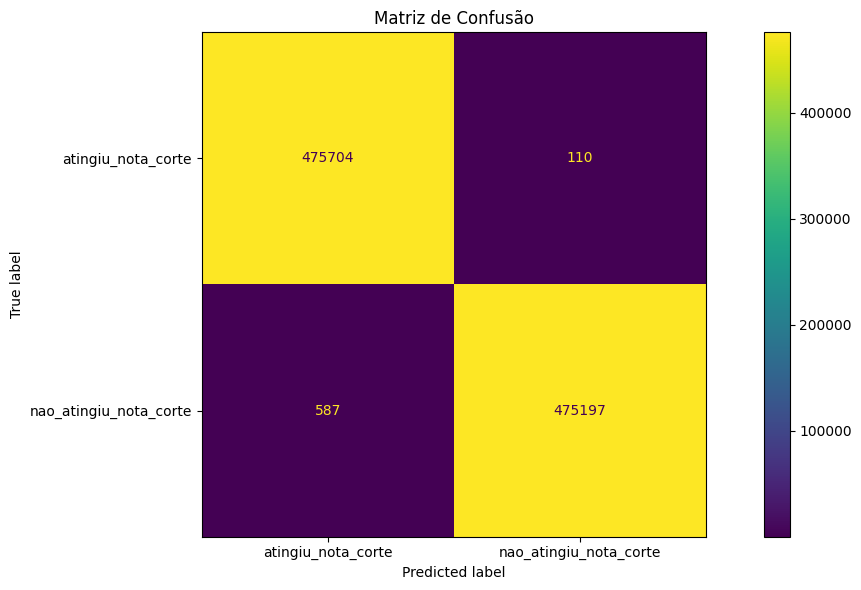

In [ ]:
#MATRIZ DE CONFUSÃO
plot_confusion_matrix(y_test, X=X_test, modelo=melhor_modelo)

In [ ]:
import joblib

In [ ]:
#salvando o modelo
joblib.dump(melhor_modelo, '/content/drive/MyDrive/After_2023/17_MBA_DS_FIA/TCC/melhor_modelo.pkl')

['/content/drive/MyDrive/After_2023/17_MBA_DS_FIA/TCC/melhor_modelo.pkl']

In [ ]:
#carrregando o modelo
# Carregar o modelo mais tarde
melhor_modelo_carregado = joblib.load('/content/drive/MyDrive/After_2023/17_MBA_DS_FIA/TCC/melhor_modelo.pkl')

##8.1-HIPERPARÂMETROS DO MODELO

In [ ]:
#escolha dos hiperparametros do lightgbm utilizando o randomized search
import time
t4 = time.time()
from lightgbm import LGBMClassifier
#from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

pipeline = Pipeline(steps=steps_comuns + [('lgbm', LGBMClassifier())])

parametros = {
    'lgbm__learning_rate': [0.01, 0.05], # [0.01, 0.015, 0.025, 0.05, 0.1],
    'lgbm__n_estimators': [300],
    'lgbm__max_depth': [3,5], # [3, 5, 7, 9, 12, 15, 17, 25],
    'lgbm__colsample_bytree': [0.6,0.7], # [0.6, 0.7, 0.8, 0.9, 1.0],
    'lgbm__subsample': [0.7,0.8], # [0.6, 0.7, 0.8, 0.9, 1.0],
    'lgbm__class_weight': ['balanced', None],
}

modelo_otimizado = RandomizedSearchCV(pipeline, parametros, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
modelo_otimizado.fit(X_train, y_train)

print()
print('='*100)
print(modelo_otimizado.best_params_)
print('\nDemorou {} segundos para GridSearch para LGBM.'.format(time.time() - t4))
print('='*100)
print()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Info] Number of positive: 1110212, number of negative: 1110182
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.725630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2298
[LightGBM] [Info] Number of data points in the train set: 2220394, number of used features: 80
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500007 -> initscore=0.000027
[LightGBM] [Info] Start training from score 0.000027
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [ ]:
#melhores parametros do modelo
modelo_otimizado.best_params_


{'lgbm__subsample': 0.8,
 'lgbm__n_estimators': 300,
 'lgbm__max_depth': 3,
 'lgbm__learning_rate': 0.05,
 'lgbm__colsample_bytree': 0.6,
 'lgbm__class_weight': None}

In [ ]:
parametros_otimizados = modelo_otimizado.best_params_

In [ ]:
parametros_lgbm = {k.split('__')[1]: v for k, v in parametros_otimizados.items() if k.startswith('lgbm__')}

In [ ]:
parametros_lgbm

{'subsample': 0.8,
 'n_estimators': 300,
 'max_depth': 3,
 'learning_rate': 0.05,
 'colsample_bytree': 0.6,
 'class_weight': None}

In [ ]:
# Criar o pipeline com os melhores parâmetros
modelo_otimizado = Pipeline(steps=steps_comuns + [
    ('lgbm', LGBMClassifier(random_state=random_state, verbose=0, **parametros_lgbm))
])

In [ ]:
#salvando o modelo otimizado
joblib.dump(modelo_otimizado, '/content/drive/MyDrive/After_2023/17_MBA_DS_FIA/TCC/modelo_otimizado.pkl')

['/content/drive/MyDrive/After_2023/17_MBA_DS_FIA/TCC/modelo_otimizado.pkl']

In [ ]:
#carregando o modelo otimizado
modelo_otimizado_carregado = joblib.load('/content/drive/MyDrive/After_2023/17_MBA_DS_FIA/TCC/modelo_otimizado.pkl')

In [ ]:
#aplicação do modelo otimiado na base de treino e teste
modelo_otimizado.fit(X_train,y_train)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Pipeline(steps=[('numeric_imputer',
                 MeanMedianImputer(variables=['NU_NOTA_CN', 'NU_NOTA_CH',
                                              'NU_NOTA_LC', 'NU_NOTA_MT',
                                              'NU_NOTA_REDACAO', 'CMO',
                                              'PEA_ES', 'PT', 'QT', 'FMT', 'IE',
                                              'IEJ', 'TFEF', 'TFEM', 'TAEI',
                                              'PSPP', 'EGRPE', 'AST', 'QST',
                                              'CC', 'CEE', 'QEE', 'QR', 'BMD',
                                              'TM', 'TC', 'CPFT', 'TI', 'TMVI',
                                              'SPAT', ...])),
                ('categoric_imputer',
                 CategoricalImputer(variables=['regiao', 'TP_STATUS_REDACAO',
                                               'TP_FAIXA_ETARIA', 'TP_SEXO',
                                               'TP_ESTADO_CIVIL', 'TP_COR_RACA',
                                               'TP_NACIONALIDADE',
                                               'TP_ST_CONCLUSAO',
                                               'TP_ANO_CONCLUIU', 'TP_ESCOLA',
                                               'IN_TREINEIRO'])),
                ('one_hot_enconder', OneHotEncoder()),
                ('lgbm',
                 LGBMClassifier(colsample_bytree=0.6, learning_rate=0.05,
                                max_depth=3, n_estimators=300, random_state=42,
                                subsample=0.8, verbose=0))])

##8.2-APLICAÇÃO DO MODELO OTIMIZADO NA BASE DE TREINO E TESTE

In [ ]:
#nova aplicação na base de treino e teste
#verificar os dados de AUC e Recall
from sklearn.metrics import roc_auc_score, recall_score

y_pred_train = modelo_otimizado.predict(X_train)
y_pred_test = modelo_otimizado.predict(X_test)

y_proba_train = modelo_otimizado.predict_proba(X_train)[:,1]
y_proba_test = modelo_otimizado.predict_proba(X_test)[:,1]

print('ROC AUC Train: ', roc_auc_score(y_train, y_proba_train))
print('ROC AUC Test: ', roc_auc_score(y_test, y_proba_test))
print()
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))

ROC AUC Train:  0.9999834269070822
ROC AUC Test:  0.9999847358890398

Recall Train:  0.9975103854038688
Recall Test:  0.9977090444403343


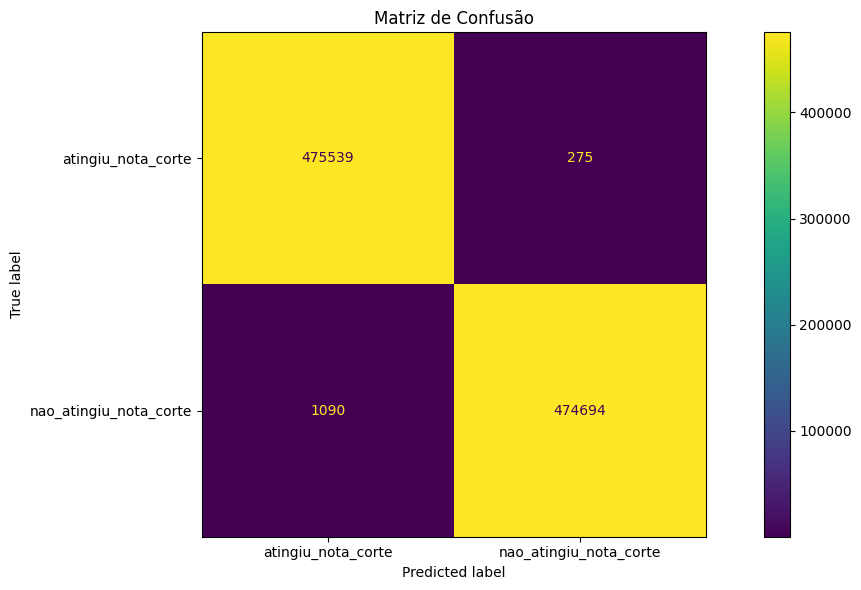

In [ ]:
#matriz de confusão

plot_confusion_matrix(y_test, X=X_test, modelo=modelo_otimizado)

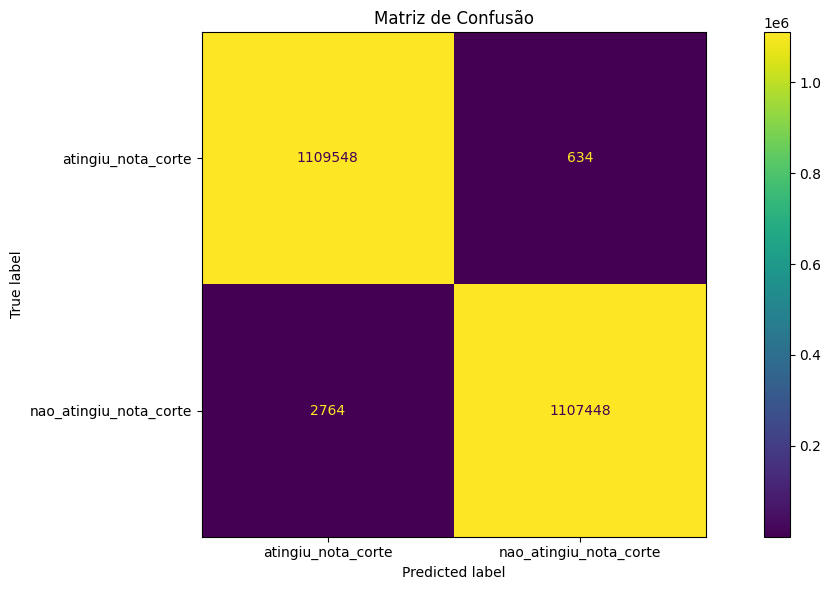

In [ ]:
#matriz de confusão - teino

plot_confusion_matrix(y_train, X=X_train, modelo=modelo_otimizado)

##8.3-COMPARAÇÃO ENTRE MODELO OTIMIZADO E O NORMAL

In [ ]:
import joblib

In [ ]:
#carregando melhor modelo
melhor_modelo_carregado = joblib.load('/content/drive/MyDrive/After_2023/17_MBA_DS_FIA/TCC/melhor_modelo.pkl')

In [ ]:
melhor_modelo=melhor_modelo_carregado

In [ ]:
#carregando melhor modelo otimizado
modelo_otimizado_carregado = joblib.load('/content/drive/MyDrive/After_2023/17_MBA_DS_FIA/TCC/modelo_otimizado.pkl')

In [ ]:
modelo_otimizado=modelo_otimizado_carregado

In [ ]:
#FUNÇÃO PARA EXIBIR AS METRICAS
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, classification_report

def exibir_metricas_classificacao(y_true, y_pred, labels=None):
    print(classification_report(y_true, y_pred, labels=labels, zero_division=0))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_bin).ravel()
    specificity = tn / (tn + fp)

    print(f'Acurácia: {accuracy_score(y_true, y_pred):.2f}')
    print(f'Acurácia Balanceada: {balanced_accuracy_score(y_true, y_pred):.2f}')
    print(f'Especificidade: {specificity:.2f}')

In [ ]:
#METRICAS MELHOR MODELO
y_pred = melhor_modelo.predict(X_test)
y_pred_bin = (y_pred> 0.5).astype(int)

In [ ]:
#verificando as metricas
exibir_metricas_classificacao(y_test, y_pred_bin)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    475814
           1       1.00      1.00      1.00    475784

    accuracy                           1.00    951598
   macro avg       1.00      1.00      1.00    951598
weighted avg       1.00      1.00      1.00    951598

Acurácia: 1.00
Acurácia Balanceada: 1.00
Especificidade: 1.00


In [ ]:
#aplicação do modelo otimiado na base de treino e teste
modelo_otimizado.fit(X_train,y_train)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Pipeline(steps=[('numeric_imputer',
                 MeanMedianImputer(variables=['NU_NOTA_CN', 'NU_NOTA_CH',
                                              'NU_NOTA_LC', 'NU_NOTA_MT',
                                              'NU_NOTA_REDACAO', 'CMO',
                                              'PEA_ES', 'PT', 'QT', 'FMT', 'IE',
                                              'IEJ', 'TFEF', 'TFEM', 'TAEI',
                                              'PSPP', 'EGRPE', 'AST', 'QST',
                                              'CC', 'CEE', 'QEE', 'QR', 'BMD',
                                              'TM', 'TC', 'CPFT', 'TI', 'TMVI',
                                              'SPAT', ...])),
                ('categoric_imputer',
                 CategoricalImputer(variables=['regiao', 'TP_STATUS_REDACAO',
                                               'TP_FAIXA_ETARIA', 'TP_SEXO',
                                               'TP_ESTADO_CIVIL', 'TP_COR_RACA',
                                               'TP_NACIONALIDADE',
                                               'TP_ST_CONCLUSAO',
                                               'TP_ANO_CONCLUIU', 'TP_ESCOLA',
                                               'IN_TREINEIRO'])),
                ('one_hot_enconder', OneHotEncoder()),
                ('lgbm',
                 LGBMClassifier(colsample_bytree=0.6, learning_rate=0.05,
                                max_depth=3, n_estimators=300, random_state=42,
                                subsample=0.8, verbose=0))])

In [ ]:
#modelo otimizado
#METRICAS MELHOR MODELO
y_pred = modelo_otimizado.predict(X_test)
y_pred_bin = (y_pred> 0.5).astype(int)

exibir_metricas_classificacao(y_test, y_pred_bin)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    475814
           1       1.00      1.00      1.00    475784

    accuracy                           1.00    951598
   macro avg       1.00      1.00      1.00    951598
weighted avg       1.00      1.00      1.00    951598

Acurácia: 1.00
Acurácia Balanceada: 1.00
Especificidade: 1.00


###Importância das variáveis

In [ ]:
X_train_transformed = modelo_otimizado[:-1].transform(X_train)

In [ ]:
feature_names = [f'feature_{i}' for i in range(X_train_transformed.shape[1])]

<Axes: >

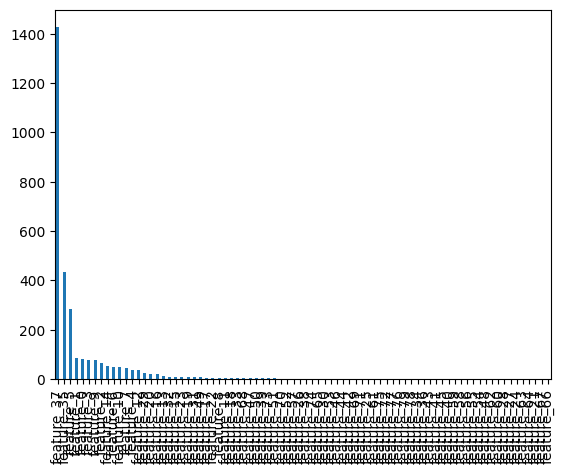

In [ ]:
#variáveis importantes
forest_importances = pd.Series(melhor_modelo[-1].feature_importances_, index=feature_names)
forest_importances.sort_values(ascending=False).plot.bar()

##8.3-COMPARAÇÃO NAS BASES DE VALIDAÇÃO

In [ ]:
#FUNÇÃO NAS BASES DE VALIDAÇÃO
def exibir_metricas_classificacao2(y_true, y_pred, labels=None):
    print(classification_report(y_true, y_pred, labels=labels, zero_division=0))
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred_bin).ravel()
    specificity = tn / (tn + fp)

    print(f'Acurácia: {accuracy_score(y_true, y_pred):.2f}')
    print(f'Acurácia Balanceada: {balanced_accuracy_score(y_true, y_pred):.2f}')
    print(f'Especificidade: {specificity:.2f}')

In [ ]:
#aplicação dos modelos nas bases de validação - melhor modelo
y_pred = melhor_modelo.predict(X_val)
y_pred_bin = (y_pred> 0.5).astype(int)

exibir_metricas_classificacao2(y_val, y_pred_bin)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94    388392
           1       0.99      0.99      0.99   1954756

    accuracy                           0.98   2343148
   macro avg       0.96      0.96      0.96   2343148
weighted avg       0.98      0.98      0.98   2343148

Acurácia: 0.98
Acurácia Balanceada: 0.96
Especificidade: 0.94


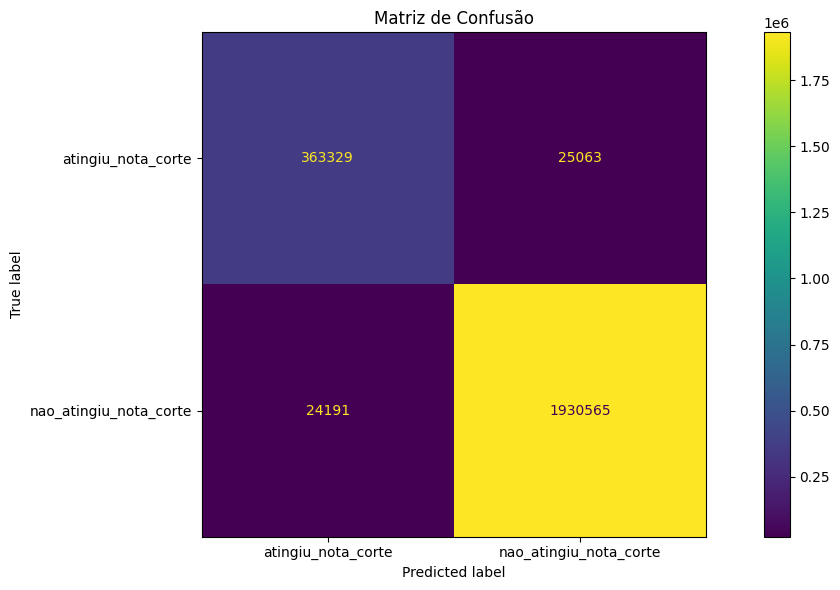

In [ ]:
#MATRIZ DE CONFUSÃO
plot_confusion_matrix(y_val, X=X_val, modelo=melhor_modelo)

In [ ]:
#aplicação dos modelos nas bases de validação - modelo otimizado
y_pred = modelo_otimizado.predict(X_val)
y_pred_bin = (y_pred> 0.5).astype(int)

exibir_metricas_classificacao2(y_val, y_pred_bin)


              precision    recall  f1-score   support

           0       0.87      0.92      0.90    388392
           1       0.98      0.97      0.98   1954756

    accuracy                           0.96   2343148
   macro avg       0.93      0.95      0.94   2343148
weighted avg       0.97      0.96      0.96   2343148

Acurácia: 0.96
Acurácia Balanceada: 0.95
Especificidade: 0.92


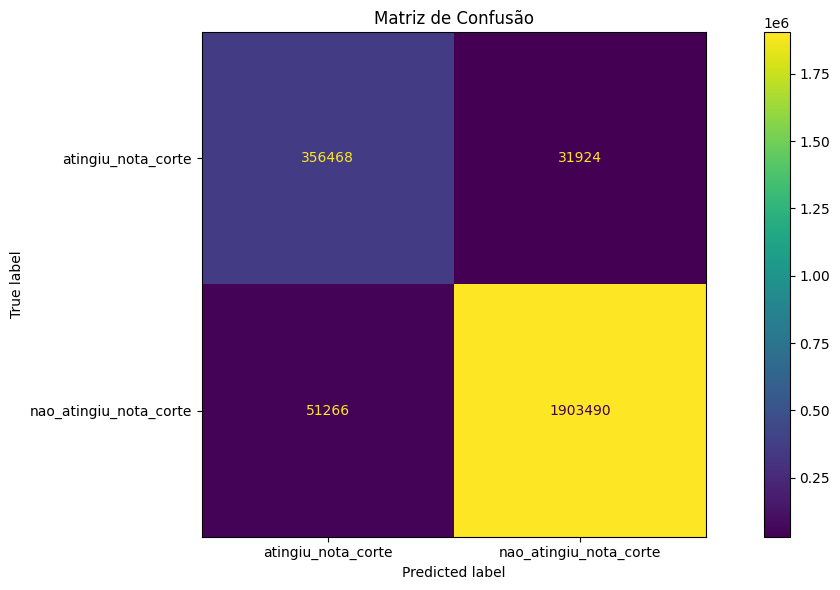

In [ ]:
#MATRIZ DE CONFUSÃO
plot_confusion_matrix(y_val, X=X_val, modelo=modelo_otimizado)

##8.4-ESCOLHA DO MODELO APÓS OTIMIZAÇÃO

In [ ]:
#CONCLUSAO
"""
Ao se comparar os 2 modelos, varifica-se que o "melhor modelo" possui desempenho mais satisfatório que o "modelo otimizado" na base de validação.
Como os 2 modelos tem desempenho semelhante nas bases de teste, escolhe-se o "melhor modelo"

"""

'\nAo se comparar os 2 modelos, varifica-se que o "melhor modelo" possui desempenho mais satisfatório que o "modelo otimizado" na base de validação.\nComo os 2 modelos tem desempenho semelhante nas bases de teste, escolhe-se o "melhor modelo"\n\n'

#9-CRIAÇÃO DE MODELOS EM DEEP LEARNING

In [58]:
#transformação das variáveis categoricas com rotulos
colunas=['TP_FAIXA_ETARIA','TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'TP_STATUS_REDACAO']
# Convertendo as colunas para categóricas
for i in colunas:
    X_train[i] = X_train[i].astype('category')



In [59]:
#SEPARAÇÃO DAS VARIÁVEIS
num_vars=['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'CMO', 'PEA_ES', 'PT', 'QT',
       'FMT', 'IE', 'IEJ', 'TFEF', 'TFEM', 'TAEI', 'PSPP', 'EGRPE', 'AST',
       'QST', 'CC', 'CEE', 'QEE', 'QR', 'BMD', 'TM', 'TC', 'CPFT', 'TI',
       'TMVI', 'SPAT', 'FALP', 'DR', 'DI', 'OI', 'CV',
       'MEDIA_MENOR_NOTA_CORTE', 'MEDIA_MAIOR_NOTA',
       'NOTA_FINAL']
cat_vars=['regiao','TP_STATUS_REDACAO','TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'IN_TREINEIRO']

target='TARGET'
features=num_vars+cat_vars

In [60]:
from sklearn.pipeline import Pipeline

from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper


# Pipeline de pré-processamento com feature-engine
data_pipeline = Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method='median')),
    ('categoric_imputer', CategoricalImputer(variables=cat_vars)),
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
    ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler()))
])

In [61]:
X_train_transformed = data_pipeline.fit_transform(X_train)
X_test_transformed = data_pipeline.transform(X_test)

In [62]:
X_train_transformed

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,CMO,PEA_ES,PT,QT,FMT,...,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,TP_ANO_CONCLUIU_Nao_informado,TP_ANO_CONCLUIU_Abaixo_7anos,TP_ANO_CONCLUIU_Entre7_15anos,TP_ESCOLA_2,TP_ESCOLA_1,TP_ESCOLA_3,IN_TREINEIRO_Nao,IN_TREINEIRO_Sim
1767934,-0.544414,-0.990074,-1.617726,-1.493236,-0.908281,-1.018610,-1.146601,-0.606972,-1.015463,-0.857322,...,0,0,1,0,0,1,0,0,1,0
642367,-1.484647,-0.482794,-1.345474,-0.758228,-1.324212,1.194264,1.212035,1.029453,1.363479,1.275428,...,0,0,0,1,0,0,1,0,1,0
1337922,1.205785,1.174964,1.516375,1.798200,1.483326,2.949719,3.086438,3.902138,2.414521,1.188309,...,0,0,0,1,0,0,1,0,1,0
1247933,-0.183283,-0.493496,0.100150,-0.201288,0.755446,-0.759003,-0.696915,-0.452494,-0.707324,-0.594987,...,0,0,0,1,0,0,1,0,1,0
2360363,-1.149310,-0.826331,0.656159,-0.681506,0.339514,1.194264,1.212035,1.029453,1.363479,1.275428,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692743,-0.951977,-0.785663,-0.955628,-1.320850,-0.180400,-1.018610,-1.146601,-0.606972,-1.015463,-0.857322,...,0,0,0,0,1,0,1,0,1,0
2356330,-0.224555,-0.975091,-1.547426,-1.529229,-3.091921,0.269627,0.061461,0.239011,-0.128731,0.492921,...,0,0,0,1,0,0,1,0,1,0
2229084,-1.288604,-0.700047,-1.034875,-1.269702,-1.220229,-0.809116,-0.764431,-0.847081,-0.599850,-0.750642,...,1,0,1,0,0,0,1,0,0,1
2768307,1.715238,2.470989,1.461413,2.172334,1.483326,0.805419,0.343598,0.345382,0.608900,1.177054,...,0,0,1,0,0,0,0,1,1,0


##9.1-REDES DENSAS

In [63]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Input

In [64]:
# Definir a arquitetura da Rede Neural Densa
# Definir a arquitetura da Rede Neural Densa
dense_model = Sequential()
dense_model.add(Dense(64, input_dim=X_train_transformed.shape[1], activation='relu'))
dense_model.add(Dense(32, activation='relu'))
dense_model.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
#compilação e treino do modelo
dense_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

dense_history = dense_model.fit(X_train_transformed, y_train, validation_split=0.2, epochs=30, batch_size=250,validation_data=(X_test_transformed, y_test))

Epoch 1/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9894 - loss: 0.0321 - val_accuracy: 0.9978 - val_loss: 0.0056
Epoch 2/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9970 - loss: 0.0070 - val_accuracy: 0.9968 - val_loss: 0.0074
Epoch 3/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9975 - loss: 0.0059 - val_accuracy: 0.9976 - val_loss: 0.0052
Epoch 4/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9977 - loss: 0.0054 - val_accuracy: 0.9987 - val_loss: 0.0035
Epoch 5/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9979 - loss: 0.0050 - val_accuracy: 0.9978 - val_loss: 0.0052
Epoch 6/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9981 - loss: 0.0047 - val_accuracy: 0.9984 - val_loss: 0.0039
Epoch 7/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9981 - loss: 0.0045 - val_accuracy: 0.9985 - val_loss: 0.0036
Epoch 8/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9982 - loss: 0

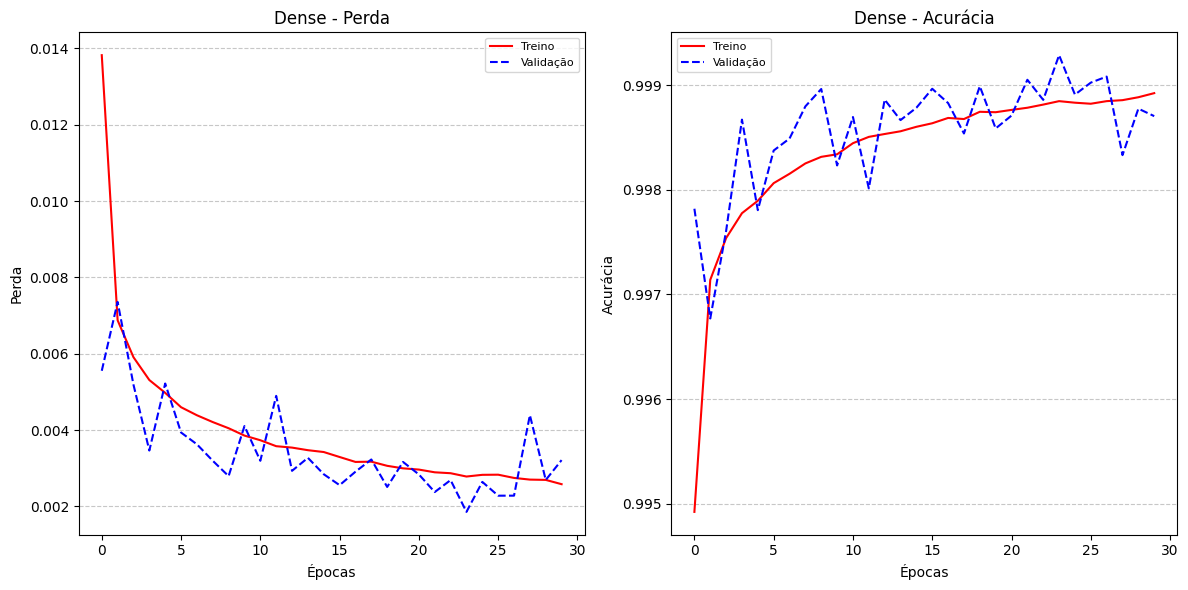

In [66]:
#verificando gráfico de perda treino e teste
import matplotlib.pyplot as plt

def plot_training_history(history, title):
    plt.figure(figsize=(12, 6))

    # Plotar a perda
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], 'r-', label='Treino')
    plt.plot(history.history['val_loss'], 'b--', label='Validação')
    plt.title(f'{title} - Perda')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend(loc='upper right', fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Plotar a precisão
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], 'r-', label='Treino')
    plt.plot(history.history['val_accuracy'], 'b--', label='Validação')
    plt.title(f'{title} - Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend(loc='upper left', fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

plot_training_history(dense_history, 'Dense')

In [43]:
#função de exibição de metricas para redes densas
def exibir_metricas_classificacao(y_true, y_pred, labels=None):
    print(classification_report(y_true, y_pred, labels=labels, zero_division=0))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    specificity = tn / (tn + fp)

    print(f'Acurácia: {accuracy_score(y_true, y_pred):.2f}')
    print(f'Acurácia Balanceada: {balanced_accuracy_score(y_true, y_pred):.2f}')
    print(f'Especificidade: {specificity:.2f}')

In [ ]:
y_pred_binary = (dense_model.predict(X_test_transformed) > 0.5).astype(int).squeeze()
exibir_metricas_classificacao(y_test, y_pred_binary)

29738/29738 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    475814
           1       1.00      1.00      1.00    475784

    accuracy                           1.00    951598
   macro avg       1.00      1.00      1.00    951598
weighted avg       1.00      1.00      1.00    951598

Acurácia: 1.00
Acurácia Balanceada: 1.00
Especificidade: 1.00


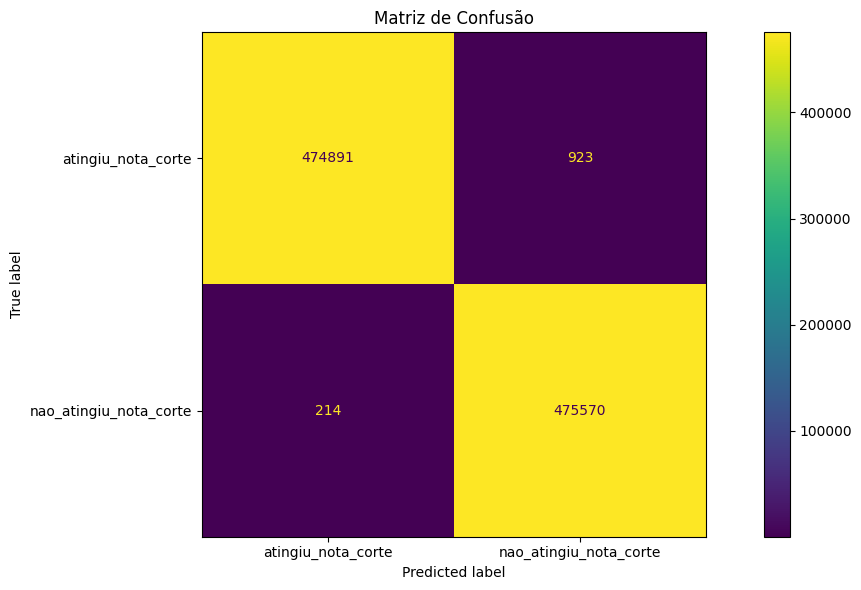

In [ ]:
#MATRIZ DE CONFUSÃO
plot_confusion_matrix(y_test, y_pred_binary)

##9.2-REDES CONVOLUCIONAIS - CNN

In [38]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

In [39]:
cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_transformed.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(32, kernel_size=2, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# Compilar o modelo
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
# Treinar o modelo
cnn_history = cnn_model.fit(X_train_transformed, y_train, validation_split=0.2, epochs=30, batch_size=250,validation_data=(X_test_transformed, y_test))

Epoch 1/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9884 - loss: 0.0306 - val_accuracy: 0.9973 - val_loss: 0.0064
Epoch 2/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9966 - loss: 0.0084 - val_accuracy: 0.9972 - val_loss: 0.0073
Epoch 3/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9972 - loss: 0.0069 - val_accuracy: 0.9965 - val_loss: 0.0084
Epoch 4/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9975 - loss: 0.0060 - val_accuracy: 0.9974 - val_loss: 0.0060
Epoch 5/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9977 - loss: 0.0055 - val_accuracy: 0.9981 - val_loss: 0.0046
Epoch 6/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9979 - loss: 0.0051 - val_accuracy: 0.9984 - val_loss: 0.0039
Epoch 7/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9981 - loss: 0.0046 - val_accuracy: 0.9986 - val_loss: 0.0035
Epoch 8/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9982 - loss: 0

In [53]:
#verificando gráfico de perda treino e teste
import matplotlib.pyplot as plt

def plot_training_history(history, title):
    plt.figure(figsize=(12, 6))

    # Plotar a perda
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], 'r-', label='Treino')
    plt.plot(history.history['val_loss'], 'b--', label='Validação')
    plt.title(f'{title} - Perda')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend(loc='upper right', fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Plotar a precisão
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], 'r-', label='Treino')
    plt.plot(history.history['val_accuracy'], 'b--', label='Validação')
    plt.title(f'{title} - Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend(loc='upper left', fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


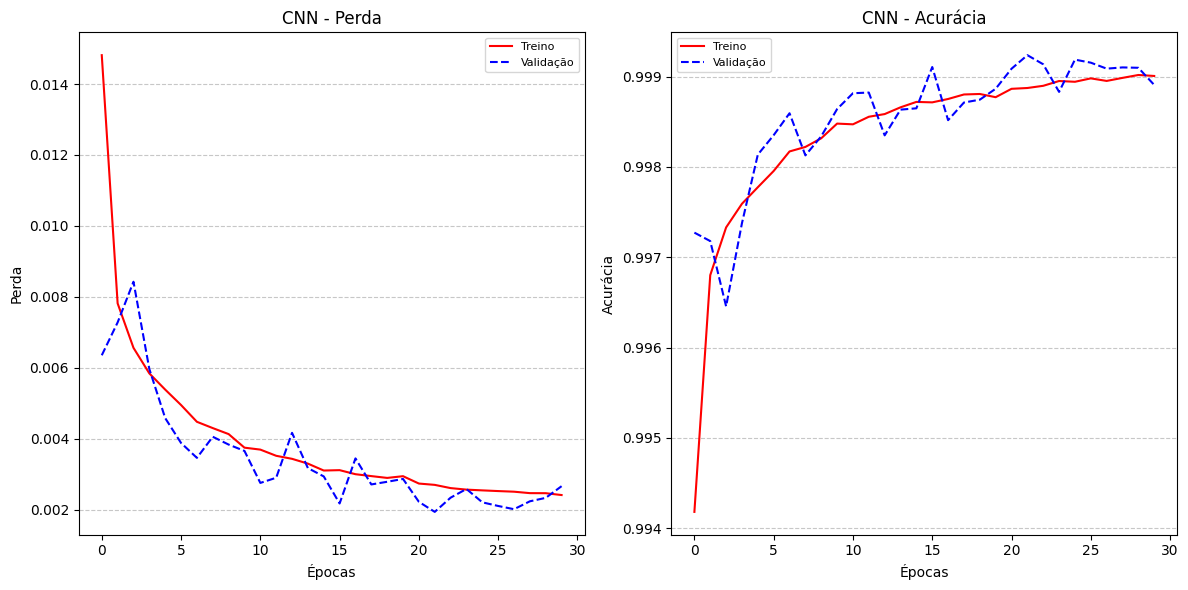

In [44]:
plot_training_history(cnn_history, 'CNN')

In [44]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, classification_report

In [45]:
#função de exibição de metricas para redes densas
def exibir_metricas_classificacao2(y_true, y_pred, labels=None):
    print(classification_report(y_true, y_pred, labels=labels, zero_division=0))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    specificity = tn / (tn + fp)

    print(f'Acurácia: {accuracy_score(y_true, y_pred):.2f}')
    print(f'Acurácia Balanceada: {balanced_accuracy_score(y_true, y_pred):.2f}')
    print(f'Especificidade: {specificity:.2f}')

In [52]:
y_pred_binary = (cnn_model.predict(X_test_transformed) > 0.5).astype(int).squeeze()
exibir_metricas_classificacao2(y_test, y_pred_binary)

29738/29738 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    475814
           1       1.00      1.00      1.00    475784

    accuracy                           1.00    951598
   macro avg       1.00      1.00      1.00    951598
weighted avg       1.00      1.00      1.00    951598

Acurácia: 1.00
Acurácia Balanceada: 1.00
Especificidade: 1.00


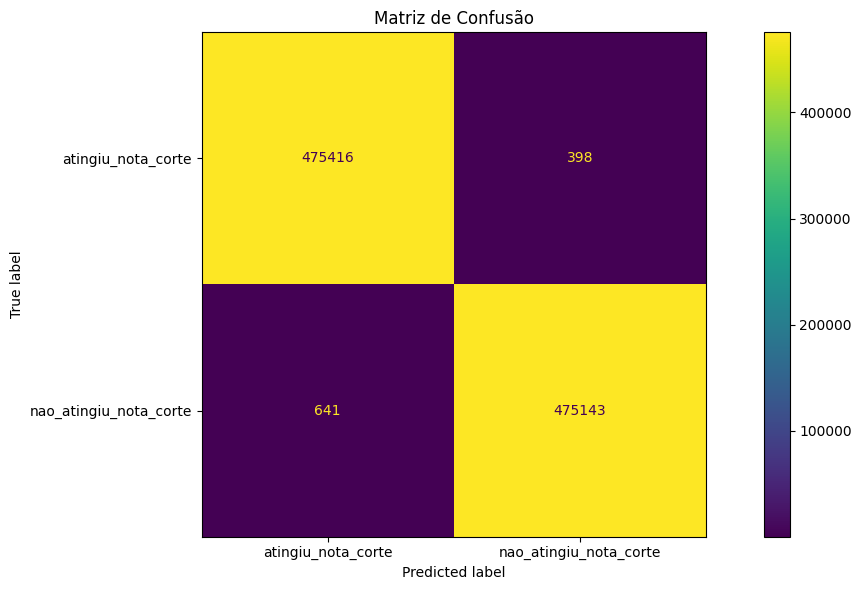

In [55]:
#MATRIZ DE CONFUSÃO
plot_confusion_matrix(y_test, y_pred_binary)

##9.3-REDES RECORRENTES- LSTM

In [46]:
time_steps = 1 # Cada ponto é independente (problema de classificação)
X_train_rnn = X_train_transformed.to_numpy().reshape((X_train_transformed.shape[0], time_steps, X_train_transformed.shape[1]))
X_test_rnn = X_test_transformed.to_numpy().reshape((X_test_transformed.shape[0], time_steps, X_test_transformed.shape[1]))

In [47]:
X_test_rnn

array([[[-1.48206722, -0.83061232, -1.40810449, ...,  0.        ,
          1.        ,  0.        ]],

       [[ 2.8747293 ,  2.12745148,  2.36253099, ...,  0.        ,
          1.        ,  0.        ]],

       [[-0.57665835, -1.13134167,  0.24074967, ...,  1.        ,
          1.        ,  0.        ]],

       ...,

       [[ 0.11981001,  0.52534529,  0.36856782, ...,  0.        ,
          1.        ,  0.        ]],

       [[-1.14802036, -1.08960343, -1.13329547, ...,  0.        ,
          1.        ,  0.        ]],

       [[ 0.52866273,  0.13364799,  0.87600588, ...,  0.        ,
          1.        ,  0.        ]]])

In [49]:
X_train_rnn

array([[[-0.54441445, -0.99007379, -1.61772626, ...,  0.        ,
          1.        ,  0.        ]],

       [[-1.48464673, -0.48279367, -1.3454736 , ...,  0.        ,
          1.        ,  0.        ]],

       [[ 1.20578475,  1.1749635 ,  1.51637483, ...,  0.        ,
          1.        ,  0.        ]],

       ...,

       [[-1.28860379, -0.70004655, -1.03487549, ...,  0.        ,
          0.        ,  1.        ]],

       [[ 1.71523846,  2.47098928,  1.46141302, ...,  1.        ,
          1.        ,  0.        ]],

       [[ 1.37732233,  1.08506576,  0.6536023 , ...,  0.        ,
          1.        ,  0.        ]]])

In [50]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Definir a arquitetura da RNN com LSTM
rnn_model = Sequential()
rnn_model.add(LSTM(10, input_shape=(time_steps, X_train_transformed.shape[1])))
rnn_model.add(Dense(1, activation='sigmoid'))


In [51]:
# Compilar o modelo
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
# Treinar o modelo
#rnn_history = rnn_model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=30, batch_size=250)

rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=30, batch_size=250,validation_data=(X_test_rnn, y_test))

Epoch 1/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.9746 - loss: 0.0854 - val_accuracy: 0.9971 - val_loss: 0.0073
Epoch 2/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.9981 - loss: 0.0058 - val_accuracy: 0.9980 - val_loss: 0.0050
Epoch 3/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.9984 - loss: 0.0043 - val_accuracy: 0.9990 - val_loss: 0.0032
Epoch 4/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.9985 - loss: 0.0037 - val_accuracy: 0.9988 - val_loss: 0.0032
Epoch 5/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.9986 - loss: 0.0035 - val_accuracy: 0.9982 - val_loss: 0.0042
Epoch 6/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.9986 - loss: 0.0035 - val_accuracy: 0.9990 - val_loss: 0.0026
Epoch 7/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.9987 - loss: 0.0033 - val_accuracy: 0.9986 - val_loss: 0.0031
Epoch 8/30
8882/8882 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.9987 - loss: 0

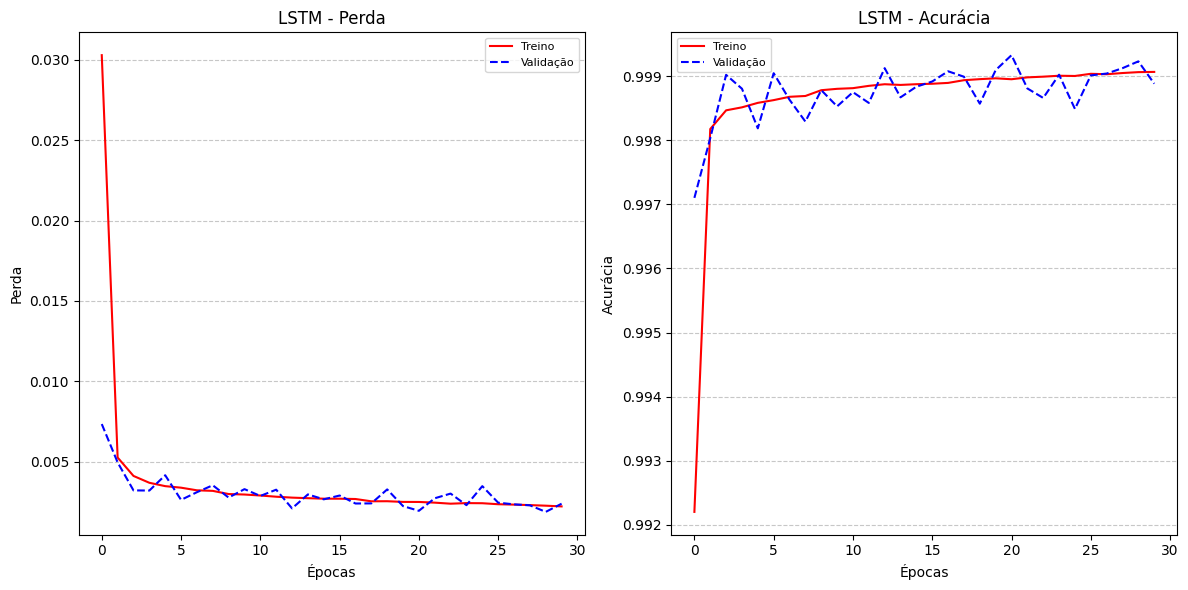

In [54]:
plot_training_history(rnn_history, 'LSTM')

In [56]:
y_pred_binary = (rnn_model.predict(X_test_rnn) > 0.5).astype(int).squeeze()
exibir_metricas_classificacao2(y_test, y_pred_binary)

29738/29738 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    475814
           1       1.00      1.00      1.00    475784

    accuracy                           1.00    951598
   macro avg       1.00      1.00      1.00    951598
weighted avg       1.00      1.00      1.00    951598

Acurácia: 1.00
Acurácia Balanceada: 1.00
Especificidade: 1.00


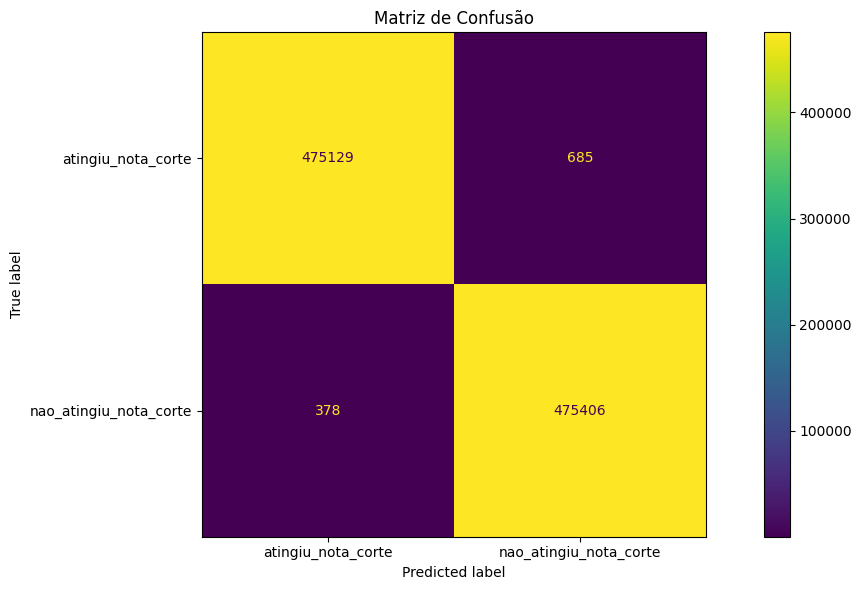

In [57]:
#MATRIZ DE CONFUSÃO
plot_confusion_matrix(y_test, y_pred_binary)

##9.5- conclusão redes neurais